## Import Library

In [1021]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msno

# train test split
from sklearn.model_selection import train_test_split, StratifiedKFold

# impute missing values
from sklearn.impute import SimpleImputer

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline


# cross validation
from sklearn.model_selection import cross_val_score, cross_validate

# import library resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

## Latar Belakang & Data Understanding :

Hotel memiliki peran besar yang menunjang bisnis di bidang pariwisata.Hotel didefinisikan sebagai tempat menyiapkan akomodasi, makanan dan minuman dan layanan lainnya, untuk disewakan kepada orang-orang serta tamu yang ingin tinggal sementara waktu. Namun seiring dengan perkembangan jaman, hotel bukan saja sebagai tempat penginapan melainkan dapat sebagai tempat melakukan pertemuan bisnis, seminar, tempat pernikahan, dan kegiatan lainnya. Pemesanan hotel sekarang sudah melalui beberapa fitur-fitur seperti website, aplikasi, email, whatsapp dan telefon. Hal ini mempermudah wisatawan yang bertempat tinggal jauh dapat menghubungi pihak hotel dan melakukan pemesanan hotel dengan mudah. 

Pada dataset ini, hotel terletak pada negara Portugal. Untuk harga rata-rata per malam di Portugal memiliki harga median $ 85 per malamnya. Tingkat kepenuhan kamar hotel tidak diketahui, maka diasumsikan dengan tingkat persentase hunian hotel Portugal adalah 49 %. Hotel pada dataset ini memiliki pelanggan yang berasal dari berbagai macam negara. Pelanggan yang mendaftar untuk menginap di hotel ini berasal dari 162 negara. Tidak diketahui data yang didapat ini merupakan daftar booking pada periode kapan. Pelanggan dapat mendaftar kamar hotel melalui media offline (datang ke hotel) atau online (aplikasi / website / telefon). Hotel ingin mengetahui pelanggan mana saja yang memang benar-benar ingin menginap karena dapat memaksimalkan pendapatan. Terdapat beberapa data pelanggan yang melakukan pemesanan kamar hotel seperti negara asal, segmen pasar, berapa kali pernah membatalkan pesanan, berapa kali melakukan perubahan pemesanan, tipe deposit, berapa lama waktu menunggu, tipe kamar yang dipesan, jumlah parkiran mobil yang dibutuhkan dan berapa banyak permintaan khusus.

Target :<br>
0 : Pelanggan menginap / bermalam di hotel (tidak dibatalkan)<br>
1 : Pemesanan kamar hotel dibatalkan

sumber : 

https://tradingeconomics.com/portugal/net-occupancy-rate-in-hotels-similar-accommodations-bedrooms-eurostat-data.html

## Rumusan Masalah :

Pelanggan yang membatalkan reservasi kamar hotel akan mengakibatkan kekosongan pada kamar yang seharusnya mereka bermalam. Pembatalan secara tiba-tiba menyebabkan kerugian bagi pihak hotel karena kemungkinan kamar hotel yg dibatalkan tidak sempat dipasarkan kembali. Pada dataset ini, tidak diketahui kapan pelanggan membatalkan pemesanan kamar hotel maka diasumsikan bahwa pelanggan melakukan pembatalan tepat pada hari dimana tanggal yang sudah dipesan. Hotel tidak mempunyai banyak waktu untuk memasarkan kembali dan telah membuang biaya untuk menyiapkan kamar hotel. Jadi pihak hotel tidak mendapatkan pendapatan bagi pelanggan yang melakukan pembatalan pemesanan kamar hotel. Pihak hotel perlu menurunkan biaya kamar pada akhir-akhir supaya kamar tersebut dapat dijual. Ini mengakibatkan mengurangi keuntungan yang didapat oleh hotel. Diasumsikan pihak hotel memerlukan konfirmasi pada 1 minggu sebelum tanggal reservasi hotel ke pelanggan, apabila pelanggan tidak memberikan tanggapan maka pihak hotel akan memasarkan dan menjual kamar tersebut. Kamar akan dijual dengan potongan harga agar pelanggan tertarik untuk bermalam dan hotel tidak mendapatkan kehilangan pendapatan

Berdasarkan data-data pelanggan yang tersedia, hotel ingin mengetahui apakah ada apa pengaruh dari variabel-variabel yang tersedia yang mempengaruhi pelanggan membatalkan reservasi kamar hotel. Ini bertujuan agar hotel memprediksi pelanggan mana yang memiliki ciri akan membatalkan reservasi kamar. Hotel ingin mengetahui variabel atau faktor apa saja yang bisa mempengaruhi pelanggan membatalkan pemesanan kamar hotel atau tidak, sehingga hotel dapat membuat perencanaan yang lebih baik terkait pelanggan yang benar-benar ingin menginap dan perencanaan cadangan untuk pelanggan yang ingin membatalkan pemesanan kamar hotel. Oleh karena itu, hotel memperkerjakan data scientist untuk memprediksi pelanggan mana yang dapat dikategorikan akan membatalkan pesanan atau tidak, agar dapat memaksimalkan pendapatan dengan mengetahui pelanggan mana yang diduga akan membatalkan pesanan. Dan juga membuat model machine learning dengan algoritma agar dapat dengan tepat memprediksi pelanggan yang membatalkan reservasi dan membuat rekomendasi berdasarkan hasil model. Dengan membuat model machine learning diharapkan dapat mengotomasi dalam memprediksi pelanggan mana yang akan membatalkan reservasi.

Analisa ini ditujukan kepada tim Marketing Hotel untuk bisa memasarkan kembali kamar yang diprediksi membatalkan reservasi kamar. Dengan tenggat waktu konfirmasi 7 hari sebelum hari menginap, tim marketing dapat memasarkan kembali kamar tersebut dan bisa menyiapkan strategi pemasarannya. Ditujukan juga kepada Manajer yang bertugas dalam reservasi / pemesanan kamar hotel untuk mempertimbangkan aksi yang diperlukan kepada pelanggan yang diprediksi membatalkan reservasi.


## Metrics :

True Positive  : Pelanggan yang diduga membatalkan pemesanan kamar hotel dan aktualnya memang membatalkan pemesanan kamar hotel.

True Negative : Pelanggan yang diduga tidak membatalkan pemesanan kamar hotel dan aktualnya memang tidak membatalkan pemesanan kamar hotel.

False Positive / Type-1 Error : Pelanggan yang diduga membatalkan pemesanan kamar hotel namun aktualnya tidak membatalkan pemesanan kamar hotel.
Kerugian bagi perusahaan :
- Ada peluang overbooking. Bedasarkan dataset,tidak diketahui berapa tingkat persentase penuhnya kamar hotel maka diamsumsikan dengan data persentase tingkat hunian hotel Protugal yaitu 49 %.

False Negative / Type-2 Error : Pelanggan yang diduga tidak membatalkan pemesanan kamar hotel namun aktualnya membatalkan pemesanan kamar hotel.
Kerugian bagi perusahaan :
- Hotel mengalami kerugiaan karena kamar yang dipesan telah disiapkan namun pelanggan melakukan pembatalan. Seharusnya perusahaan dapat menjual kamar tersebut ke pelanggan lainnya. Perusahaan mendapat kerugian kehilangan pendapatan sewa hotel yang seharusnya didapat.

Metric Analisis :

- Kamar hotel yang diprediksi dibatalkan oleh pelanggan, pihak hotel memasarkan dan menjual kembali kamar tersebut dengan pemberian biaya potongan atau diskon. Ada peluang kamar hotel ini akan kosong namun dengan pemberian potongan harga diharapkan dapat mendorong pelanggan lain untuk bermalam. Rata-rata potongan harga yang diberikan senilai 13% dari harga kamar.
- Berdasarkan metriks evaluasi, kita ingin memfokuskan pada False Negative atau Type-2 Error karena ingin mengurangi potensi kehilangan pendapatan. Kita ingin memfokuskan pada pelanggan yang diprediksi tidak membatalkan reservasi (jadi bermalam) namun ada yang aktualnya pelanggan membatalkan reservasi. Hotel mendapatkan kehilangan pendapatan 1 kamar senilai $ 89 berdasarkan rata-rata harga 1 malam di negara Portugal
- Kita juga tetap harus memperhatikan False Positive atau Type-1 Error. Pelanggan yang diprediksi membatalkan reservasi namun aktualnya pelanggan tidak membatalkan reservasi akan berpeluang kamar hotel tidak cukup atau tersedia lagi. Tingkat hunian rata-rata di Portugal per Feb 2023 senilai 49 % sehingga dampak terjadi overbooking bisa diamsumsikan cukup kecil. Hotel akan mendapat keuntungan yang lebih sedikit karena diamsumsikan hotel memberikan diskon sebesar 13 % untuk kamar yang diprediksi akan dibatalkan oleh pelanggan.
- Metrics scoring difokuskan pada F2 Score karena ingin menekan biaya False Negative namun masih memperhatikan False Positive.

## Load Dataset, Data Understanding and Data Cleaning


In [1022]:
df=pd.read_csv('data_hotel_booking_demand.csv')
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


Terdapat 11 kolom, 10 kolom feature dan 1 kolom target. Kolom feature merupakan kolom dari data pelanggan yang akan diuji machine learning untuk memprediksi target (apakah booking akan dibatalkan atau tidak dibatalkan)

Features :
-	country: Negara asal
-	market_segment: Segmen pasar
-	previous_cancellations: Jumlah pemesanan yang dibatalkan oleh pelanggan sebelum pemesanan ini.
-	booking_changes: Jumlah pengubahan pemesanan kamar hotel sebelum pelanggan check in atau membatalkannya.
-	deposit_type: Tipe deposit yang dilakukan
-	days_in_waiting_list: Jumlah hari pelanggan harus menunggu sebelum pihak hotel bisa mengkonfirmasi pemesanannya
-	customer_type: Tipe pemesanan
-	reserved_room_type: Kode dari tipe kamar.
-	required_car_parking_space: Jumlah tempat parkir gratis yang dibutuhkan oleh pelanggan
-	total_of_special_request: Jumlah permintaan khusus dari pelanggan (seperti twin bed, lantai tinggi)
-	is_canceled: Nilai yang mengindikasi pemesanan dibatalkan (1) atau tetap berjalan (0)

Data 1 baris mewakili data reservasi pelanggan beserta beberapa informasi dari pelanggan. Contoh untuk baris ke 0:
- Pelanggan berasal dari negara Irlandia
- Pelanggan berasal dari memesan reserverasi dari Offline Trabel Agent
- Pelanggan sebelumnya tidak pernah melakukan pembatalan reservasi
- Pelanggan tidak pernah melakukan perubahan pemesanan / reservasi
- Pelanggan tidak memberikan Deposit Uang
- Pelanggan tidak pernah mendapat waiting list reservasi
- Tipe pelanggan Transient-Party
- Pelanggan melakukan pesanan untuk tipe kamar A
- Pelanggan tidak memerlukan slot parkiran hotel
- Pelanggan tidak memesan tambahan khusus
- Pelanggan tidak membatalkan pemesanan kamar hotel

In [1023]:
column_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes,
    'Number of Unique Values': df.nunique(),
    'Sample Values': list(df.iloc[0])
})

column_info.reset_index().drop(columns='index')

,Column Name,Data Type,Number of Unique Values,Sample Values
0,country,object,162,IRL
1,market_segment,object,8,Offline TA/TO
2,previous_cancellations,int64,15,0
3,booking_changes,int64,19,0
4,deposit_type,object,3,No Deposit
5,days_in_waiting_list,int64,115,0
6,customer_type,object,4,Transient-Party
7,reserved_room_type,object,10,A
8,required_car_parking_spaces,int64,5,0
9,total_of_special_requests,int64,6,0


In [1024]:
df.isna().sum()

country                        351
market_segment                 0  
previous_cancellations         0  
booking_changes                0  
deposit_type                   0  
days_in_waiting_list           0  
customer_type                  0  
reserved_room_type             0  
required_car_parking_spaces    0  
total_of_special_requests      0  
is_canceled                    0  
dtype: int64

Terdapat 351 Baris pada kolom country yang memiliki missing values (nilai kosong), missing values akan diisi menggunakan nilai modus (most frequent) pada tahap preprocesssing.

In [1025]:
display(df.describe(), df.describe(include='object'))

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


Berikut adalah Statistik deskriptif untuk keseluruhan data:
- Rata-rata jumlah reservasi yang sebelumnya dibatalkan adalah 0 kali. Tetapi ada pelanggan yang pernah membatalkan reservasi sebanyak 26 kali.
- Rata-rata jumlah pengubahan reservasi adalah 0 kali. Tetapi ada pelanggan yang mengganti jumlah reservasi sebanyak 21
- Rata-rata banyaknya hari pelanggan menunggu dalam masa tunggu adalah 0 hari.
- Rata-rata jumlah parkir yang dibutuhkan pelanggan adalah 0.
- Rata-rata jumlah permintaan tambahan oleh pelanggan adalah 0.
- Pelanggan dari negara PRT yang paling sering memesan kamar pada hotel ini.
- Pelanggan paling banyak berasal dari segmen pasar Online Travent Agent
- Pelanggan kebanyakan tidak melakukan deposit
- Tipe pelanggan yang memesan kamar hotel adalah 'Transient'
- Kamar yang paling sering dipesan adalah tipe A.

In [1026]:
df.duplicated().sum()

73371

Ada 73371 data yang terdapat nilai duplikat atau pengulangan. Maka akan kita drop data ini duplikat agar model machine learning yang dibuat tidak overfitting

In [1027]:
df=df.drop_duplicates()

# command untuk membuang data duplikat

In [1028]:
df=df.reset_index().drop(columns='index')
df

# bertujuan untuk mengembalikan nilai index agar sesuai dengan urutan setelah penghapusan nilai duplikat

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
10197,GBR,Direct,0,2,No Deposit,0,Transient-Party,A,1,1,0
10198,CHN,Online TA,0,0,No Deposit,0,Transient-Party,C,0,2,0
10199,BEL,Groups,0,0,No Deposit,0,Transient-Party,A,0,1,0
10200,NLD,Online TA,0,0,No Deposit,0,Transient,B,0,0,0


In [1029]:
# 'Data Type': df.dtypes,

In [1030]:
df['booking_changes'].dtypes

dtype('int64')

In [1031]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].dtypes, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

C:\Users\Kevin Octa\AppData\Local\Temp\ipykernel_27428\2691644383.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Data Type,Number of Unique,Unique Sample
0,country,object,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL, JPN, DEU, ITA, CHE, GBR, AGO, SRB, COL, CHN, SWE, AUT, CIV, CZE, POL, USA, SGP, RUS, ROU, DNK, IND, MAR, PHL, ARG, ISL, ZAF, LBN, MOZ, TUR, BGD, MEX, CAF, NOR, FIN, UKR, EGY, ISR, nan, KOR, AZE, HUN, AUS, EST, CHL, SVN, PRY, ABW, ALB, LTU, ARE, HRV, SAU, NZL, LVA, ATA, KAZ, DZA, TWN, CRI, BIH, BGR, IRQ, OMN, VEN, IDN, GEO, MLT, IRN, BLR, URY, LBY, TUN, BEN, MYS, MWI, GRC, CYP, CPV, HKG, PRI, MKD, MUS, IMN, PAN, NGA, GLP, KHM, PER, QAT, SEN, MAC, ...]"
1,market_segment,object,8,"[Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]"
2,previous_cancellations,int64,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19, 5, 21]"
3,booking_changes,int64,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12, 14, 21, 16, 20, 15]"
4,deposit_type,object,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,int64,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31, 122, 34, 57, 259, 50, 17, 32, 43, 75, 69, 44, 22, 113, 58, 38, 65, 48, 236, 176, 25, 108, 91, 19, 160, 68, 28, 63, 35, 42, 59, 24, 8, 183, 187, 21, 111, 56, 98, 101, 15, 16, 47, 93, 45, 14, 70, 10, 49, 178, 99, 60, 40, 85, 223, 6, 33, 391, 20, 1, 41, 147, 55, 80, 379, 150, 61, 330, 174, 107, 96, 18, 62, 13, 30, 120, 27, 207, 71, 2, 76, 125, 5, 9, 224, 53, 83, 84, 12, ...]"
6,customer_type,object,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,object,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,int64,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,int64,6,"[0, 2, 1, 3, 4, 5]"


Table diatas untuk memunculkan jumlah unique value dan nilai unique nya untuk masing-masing kolom.
- Kolom country : terdapat 162 negara yang berbeda
- Kolom market_segment : terdapat 7 segment pasar yaitu Offline TA/TO (dari travel agent secara offline), Online TA (dari travel agent secara online misal dari website), Direct (langsung menghubungi pihak hotel), Groups (Travel Agent Grup), Corporate (perusahaan), Complementary (pelanggan yang mendapat kamar gratis) dan Aviation (penerbangan / airlines) 
- Kolom deposit_type : terdapat 3 jenis yaitu No Deposit (tidak ada deposit), Non Refund (tidak bisa refund) dan Refundable (bisa refund)
- Kolom customer_type : terdapat 4 tipe pelanggan yaitu, Transient-Party (grup yang bermalam dengan periode singkat), Transient (bermalam dengan periode singkat), Contract (kontrak) dan Group (Grup)
- Kolom reserved_room_type : terdapat 10 tipe kamar yaitu A, E, D, F, B, G, C, H, L, P


Pada kolom market_segment terdapat nilai Undefined, maka akan kita isi pada tahap preprocessing. Untuk mengisi nilai missing value maka undefined harus diubah menjadi missing values (NaN)

In [1032]:
df['market_segment']=df['market_segment'].replace({'Undefined':np.nan})

In [1033]:
df['market_segment'].isna().sum()

# undefined berhasil diubah menjadi missing value / nan

1

In [1034]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10202 entries, 0 to 10201
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      10084 non-null  object
 1   market_segment               10201 non-null  object
 2   previous_cancellations       10202 non-null  int64 
 3   booking_changes              10202 non-null  int64 
 4   deposit_type                 10202 non-null  object
 5   days_in_waiting_list         10202 non-null  int64 
 6   customer_type                10202 non-null  object
 7   reserved_room_type           10202 non-null  object
 8   required_car_parking_spaces  10202 non-null  int64 
 9   total_of_special_requests    10202 non-null  int64 
 10  is_canceled                  10202 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 876.9+ KB


Berikut lalu kita tambahkan kolom baru untuk mengkategorikan negara termasuk dalam benua mana.

In [1035]:
COUNTRY_ALPHA3_TO_COUNTRY_ALPHA2 = {
    'ABH': 'AB',
    'ABW': 'AW',
    'AFG': 'AF',
    'AGO': 'AO',
    'AIA': 'AI',
    'ALA': 'AX',
    'ALB': 'AL',
    'AND': 'AD',
    'ARE': 'AE',
    'ARG': 'AR',
    'ARM': 'AM',
    'ASM': 'AS',
    'ATA': 'AQ',
    'ATG': 'AG',
    'AUS': 'AU',
    'AUT': 'AT',
    'AZE': 'AZ',
    'BDI': 'BI',
    'BEL': 'BE',
    'BEN': 'BJ',
    'BFA': 'BF',
    'BGD': 'BD',
    'BGR': 'BG',
    'BHR': 'BH',
    'BHS': 'BS',
    'BIH': 'BA',
    'BLM': 'BL',
    'BLR': 'BY',
    'BLZ': 'BZ',
    'BMU': 'BM',
    'BOL': 'BO',
    'BRA': 'BR',
    'BRB': 'BB',
    'BRN': 'BN',
    'BTN': 'BT',
    'BVT': 'BV',
    'BWA': 'BW',
    'CAF': 'CF',
    'CAN': 'CA',
    'CCK': 'CC',
    'CHE': 'CH',
    'CHL': 'CL',
    'CHN': 'CN',
    'CIV': 'CI',
    'CMR': 'CM',
    'COD': 'CD',
    'COG': 'CG',
    'COK': 'CK',
    'COL': 'CO',
    'COM': 'KM',
    'CPV': 'CV',
    'CRI': 'CR',
    'CUB': 'CU',
    'CUW': 'CW',
    'CXR': 'CX',
    'CYM': 'KY',
    'CYP': 'CY',
    'CZE': 'CZ',
    'DEU': 'DE',
    'DJI': 'DJ',
    'DMA': 'DM',
    'DNK': 'DK',
    'DOM': 'DO',
    'DZA': 'DZ',
    'ECU': 'EC',
    'EGY': 'EG',
    'ERI': 'ER',
    'ESP': 'ES',
    'EST': 'EE',
    'ETH': 'ET',
    'FIN': 'FI',
    'FJI': 'FJ',
    'FLK': 'FK',
    'FRA': 'FR',
    'FRO': 'FO',
    'FSM': 'FM',
    'GAB': 'GA',
    'GBR': 'GB',
    'GEO': 'GE',
    'GGY': 'GG',
    'GHA': 'GH',
    'GIB': 'GI',
    'GIN': 'GN',
    'GLP': 'GP',
    'GMB': 'GM',
    'GNB': 'GW',
    'GNQ': 'GQ',
    'GRC': 'GR',
    'GRD': 'GD',
    'GRL': 'GL',
    'GTM': 'GT',
    'GUF': 'GF',
    'GUM': 'GU',
    'GUY': 'GY',
    'HKG': 'HK',
    'HMD': 'HM',
    'HND': 'HN',
    'HRV': 'HR',
    'HTI': 'HT',
    'HUN': 'HU',
    'IDN': 'ID',
    'IMN': 'IM',
    'IND': 'IN',
    'IOT': 'IO',
    'IRL': 'IE',
    'IRN': 'IR',
    'IRQ': 'IQ',
    'ISL': 'IS',
    'ISR': 'IL',
    'ITA': 'IT',
    'JAM': 'JM',
    'JEY': 'JE',
    'JOR': 'JO',
    'JPN': 'JP',
    'KAZ': 'KZ',
    'KEN': 'KE',
    'KGZ': 'KG',
    'KHM': 'KH',
    'KIR': 'KI',
    'KNA': 'KN',
    'KOR': 'KR',
    'KWT': 'KW',
    'LAO': 'LA',
    'LBN': 'LB',
    'LBR': 'LR',
    'LBY': 'LY',
    'LCA': 'LC',
    'LIE': 'LI',
    'LKA': 'LK',
    'LSO': 'LS',
    'LTU': 'LT',
    'LUX': 'LU',
    'LVA': 'LV',
    'MAC': 'MO',
    'MAF': 'MF',
    'MAR': 'MA',
    'MCO': 'MC',
    'MDA': 'MD',
    'MDG': 'MG',
    'MDV': 'MV',
    'MEX': 'MX',
    'MHL': 'MH',
    'MKD': 'MK',
    'MLI': 'ML',
    'MLT': 'MT',
    'MMR': 'MM',
    'MNE': 'ME',
    'MNG': 'MN',
    'MNP': 'MP',
    'MOZ': 'MZ',
    'MRT': 'MR',
    'MSR': 'MS',
    'MTQ': 'MQ',
    'MUS': 'MU',
    'MWI': 'MW',
    'MYS': 'MY',
    'MYT': 'YT',
    'NAM': 'NA',
    'NCL': 'NC',
    'NER': 'NE',
    'NFK': 'NF',
    'NGA': 'NG',
    'NIC': 'NI',
    'NIU': 'NU',
    'NLD': 'NL',
    'NOR': 'NO',
    'NPL': 'NP',
    'NRU': 'NR',
    'NZL': 'NZ',
    'OMN': 'OM',
    'OST': 'OS',
    'PAK': 'PK',
    'PAN': 'PA',
    'PER': 'PE',
    'PHL': 'PH',
    'PLW': 'PW',
    'PNG': 'PG',
    'POL': 'PL',
    'PRI': 'PR',
    'PRK': 'KP',
    'PRT': 'PT',
    'PRY': 'PY',
    'PSE': 'PS',
    'PYF': 'PF',
    'QAT': 'QA',
    'REU': 'RE',
    'ROU': 'RO',
    'RUS': 'RU',
    'RWA': 'RW',
    'SAU': 'SA',
    'SDN': 'SD',
    'SEN': 'SN',
    'SGP': 'SG',
    'SGS': 'GS',
    'SHN': 'SH',
    'SLB': 'SB',
    'SLE': 'SL',
    'SLV': 'SV',
    'SMR': 'SM',
    'SOM': 'SO',
    'SPM': 'PM',
    'SRB': 'RS',
    'SSD': 'SS',
    'STP': 'ST',
    'SUR': 'SR',
    'SVK': 'SK',
    'SVN': 'SI',
    'SWE': 'SE',
    'SWZ': 'SZ',
    'SYC': 'SC',
    'SYR': 'SY',
    'TCA': 'TC',
    'TCD': 'TD',
    'TGO': 'TG',
    'THA': 'TH',
    'TJK': 'TJ',
    'TKL': 'TK',
    'TKM': 'TM',
    'TON': 'TO',
    'TMP': 'TP',
    'TTO': 'TT',
    'TUN': 'TN',
    'TUR': 'TR',
    'TUV': 'TV',
    'TWN': 'TW',
    'TZA': 'TZ',
    'UAE': 'AE',
    'UGA': 'UG',
    'UKR': 'UA',
    'UMI': 'UM',
    'URY': 'UY',
    'USA': 'US',
    'UZB': 'UZ',
    'VCT': 'VC',
    'VEN': 'VE',
    'VGB': 'VG',
    'VIR': 'VI',
    'VNM': 'VN',
    'VUT': 'VU',
    'WLF': 'WF',
    'WSM': 'WS',
    'YEM': 'YE',
    'ZAF': 'ZA',
    'ZMB': 'ZM',
    'ZWE': 'ZW',
}


def convert_country_alpha3_to_country_alpha2(country_3_code):
    """Convert country code to country name.
    """
    # if country_3_code not in COUNTRY_ALPHA3_TO_COUNTRY_ALPHA2:
    #     raise KeyError

    return COUNTRY_ALPHA3_TO_COUNTRY_ALPHA2[country_3_code]

Function untuk mengubah kode alpha-3 negara menjadi alpha-2 negara

In [1036]:
COUNTRY_ALPHA2_TO_CONTINENT = {
    'AB': 'Asia',
    'AD': 'Europe',
    'AE': 'Asia',
    'AF': 'Asia',
    'AG': 'America',
    'AI': 'America',
    'AL': 'Europe',
    'AM': 'Asia',
    'AO': 'Africa',
    'AR': 'America',
    'AS': 'Oceania',
    'AT': 'Europe',
    'AU': 'Oceania',
    'AW': 'America',
    'AX': 'Europe',
    'AZ': 'Asia',
    'BA': 'Europe',
    'BB': 'America',
    'BD': 'Asia',
    'BE': 'Europe',
    'BF': 'Africa',
    'BG': 'Europe',
    'BH': 'Asia',
    'BI': 'Africa',
    'BJ': 'Africa',
    'BL': 'America',
    'BM': 'America',
    'BN': 'Asia',
    'BO': 'America',
    'BQ': 'America',
    'BR': 'America',
    'BS': 'America',
    'BT': 'Asia',
    'BV': 'Antarctica',
    'BW': 'Africa',
    'BY': 'Europe',
    'BZ': 'America',
    'CA': 'America',
    'CC': 'Asia',
    'CD': 'Africa',
    'CF': 'Africa',
    'CG': 'Africa',
    'CH': 'Europe',
    'CI': 'Africa',
    'CK': 'Oceania',
    'CL': 'America',
    'CM': 'Africa',
    'CN': 'Asia',
    'CO': 'America',
    'CR': 'America',
    'CU': 'America',
    'CV': 'Africa',
    'CW': 'America',
    'CX': 'Asia',
    'CY': 'Asia',
    'CZ': 'Europe',
    'DE': 'Europe',
    'DJ': 'Africa',
    'DK': 'Europe',
    'DM': 'America',
    'DO': 'America',
    'DZ': 'Africa',
    'EC': 'America',
    'EE': 'Europe',
    'EG': 'Africa',
    'ER': 'Africa',
    'ES': 'Europe',
    'ET': 'Africa',
    'FI': 'Europe',
    'FJ': 'Oceania',
    'FK': 'America',
    'FM': 'Oceania',
    'FO': 'Europe',
    'FR': 'Europe',
    'GA': 'Africa',
    'GB': 'Europe',
    'GD': 'America',
    'GE': 'Asia',
    'GF': 'America',
    'GG': 'Europe',
    'GH': 'Africa',
    'GI': 'Europe',
    'GL': 'America',
    'GM': 'Africa',
    'GN': 'Africa',
    'GP': 'America',
    'GQ': 'Africa',
    'GR': 'Europe',
    'GS': 'America',
    'GT': 'America',
    'GU': 'Oceania',
    'GW': 'Africa',
    'GY': 'America',
    'HK': 'Asia',
    'HM': 'Antarctica',
    'HN': 'America',
    'HR': 'Europe',
    'HT': 'America',
    'HU': 'Europe',
    'ID': 'Asia',
    'IE': 'Europe',
    'IL': 'Asia',
    'IM': 'Europe',
    'IN': 'Asia',
    'IO': 'Asia',
    'IQ': 'Asia',
    'IR': 'Asia',
    'IS': 'Europe',
    'IT': 'Europe',
    'JE': 'Europe',
    'JM': 'America',
    'JO': 'Asia',
    'JP': 'Asia',
    'KE': 'Africa',
    'KG': 'Asia',
    'KH': 'Asia',
    'KI': 'Oceania',
    'KM': 'Africa',
    'KN': 'America',
    'KP': 'Asia',
    'KR': 'Asia',
    'KW': 'Asia',
    'KY': 'America',
    'KZ': 'Asia',
    'LA': 'Asia',
    'LB': 'Asia',
    'LC': 'America',
    'LI': 'Europe',
    'LK': 'Asia',
    'LR': 'Africa',
    'LS': 'Africa',
    'LT': 'Europe',
    'LU': 'Europe',
    'LV': 'Europe',
    'LY': 'Africa',
    'MA': 'Africa',
    'MC': 'Europe',
    'MD': 'Europe',
    'ME': 'Europe',
    'MF': 'America',
    'MG': 'Africa',
    'MH': 'Oceania',
    'MK': 'Europe',
    'ML': 'Africa',
    'MM': 'Asia',
    'MN': 'Asia',
    'MO': 'Asia',
    'MP': 'Oceania',
    'MQ': 'America',
    'MR': 'Africa',
    'MS': 'America',
    'MT': 'Europe',
    'MU': 'Africa',
    'MV': 'Asia',
    'MW': 'Africa',
    'MX': 'America',
    'MY': 'Asia',
    'MZ': 'Africa',
    'NA': 'Africa',
    'NC': 'Oceania',
    'NE': 'Africa',
    'NF': 'Oceania',
    'NG': 'Africa',
    'NI': 'America',
    'NL': 'Europe',
    'NO': 'Europe',
    'NP': 'Asia',
    'NR': 'Oceania',
    'NU': 'Oceania',
    'NZ': 'Oceania',
    'OM': 'Asia',
    'OS': 'Asia',
    'PA': 'America',
    'PE': 'America',
    'PF': 'Oceania',
    'PG': 'Oceania',
    'PH': 'Asia',
    'PK': 'Asia',
    'PL': 'Europe',
    'PM': 'America',
    'PR': 'America',
    'PS': 'Asia',
    'PT': 'Europe',
    'PW': 'Oceania',
    'PY': 'America',
    'QA': 'Asia',
    'RE': 'Africa',
    'RO': 'Europe',
    'RS': 'Europe',
    'RU': 'Europe',
    'RW': 'Africa',
    'SA': 'Asia',
    'SB': 'Oceania',
    'SC': 'Africa',
    'SD': 'Africa',
    'SE': 'Europe',
    'SG': 'Asia',
    'SH': 'Africa',
    'SI': 'Europe',
    'SJ': 'Europe',
    'SK': 'Europe',
    'SL': 'Africa',
    'SM': 'Europe',
    'SN': 'Africa',
    'SO': 'Africa',
    'SR': 'America',
    'SS': 'Africa',
    'ST': 'Africa',
    'SV': 'America',
    'SY': 'Asia',
    'SZ': 'Africa',
    'TC': 'America',
    'TD': 'Africa',
    'TG': 'Africa',
    'TH': 'Asia',
    'TJ': 'Asia',
    'TK': 'Oceania',
    'TM': 'Asia',
    'TN': 'Africa',
    'TO': 'Oceania',
    'TP': 'Asia',
    'TR': 'Asia',
    'TT': 'America',
    'TV': 'Oceania',
    'TW': 'Asia',
    'TZ': 'Africa',
    'UA': 'Europe',
    'UG': 'Africa',
    'US': 'America',
    'UY': 'America',
    'UZ': 'Asia',
    'VC': 'America',
    'VE': 'America',
    'VG': 'America',
    'VI': 'America',
    'VN': 'Asia',
    'VU': 'Oceania',
    'WF': 'Oceania',
    'WS': 'Oceania',
    'XK': 'Europe',
    'YE': 'Asia',
    'YT': 'Africa',
    'ZA': 'Africa',
    'ZM': 'Africa',
    'ZW': 'Africa',
    'UM': 'Oceania',
    'AQ': 'Antartica'
}


def convert_country_alpha2_to_continent(country_2_code):
    """Convert country code to continent.
    # """
    # if country_2_code not in COUNTRY_ALPHA2_TO_CONTINENT:
    #     raise KeyError

    return COUNTRY_ALPHA2_TO_CONTINENT[country_2_code]

Function untuk mengubah kode alpha-2 negara menjadi continent

In [1037]:
list_continent = []
for i in range(len(df)):
    if type(df['country'][i])==float:           # untuk kolom nan
        list_continent.append(np.nan)
    elif len(df['country'][i]) == 3 :
        list_continent.append(convert_country_alpha2_to_continent(convert_country_alpha3_to_country_alpha2(df['country'][i])))
    elif len(df['country'][i]) == 2 :
        list_continent.append(convert_country_alpha2_to_continent(df['country'][i]))


In [1038]:
df.insert(1, 'continent', list_continent)

# menambahkan kolom continent

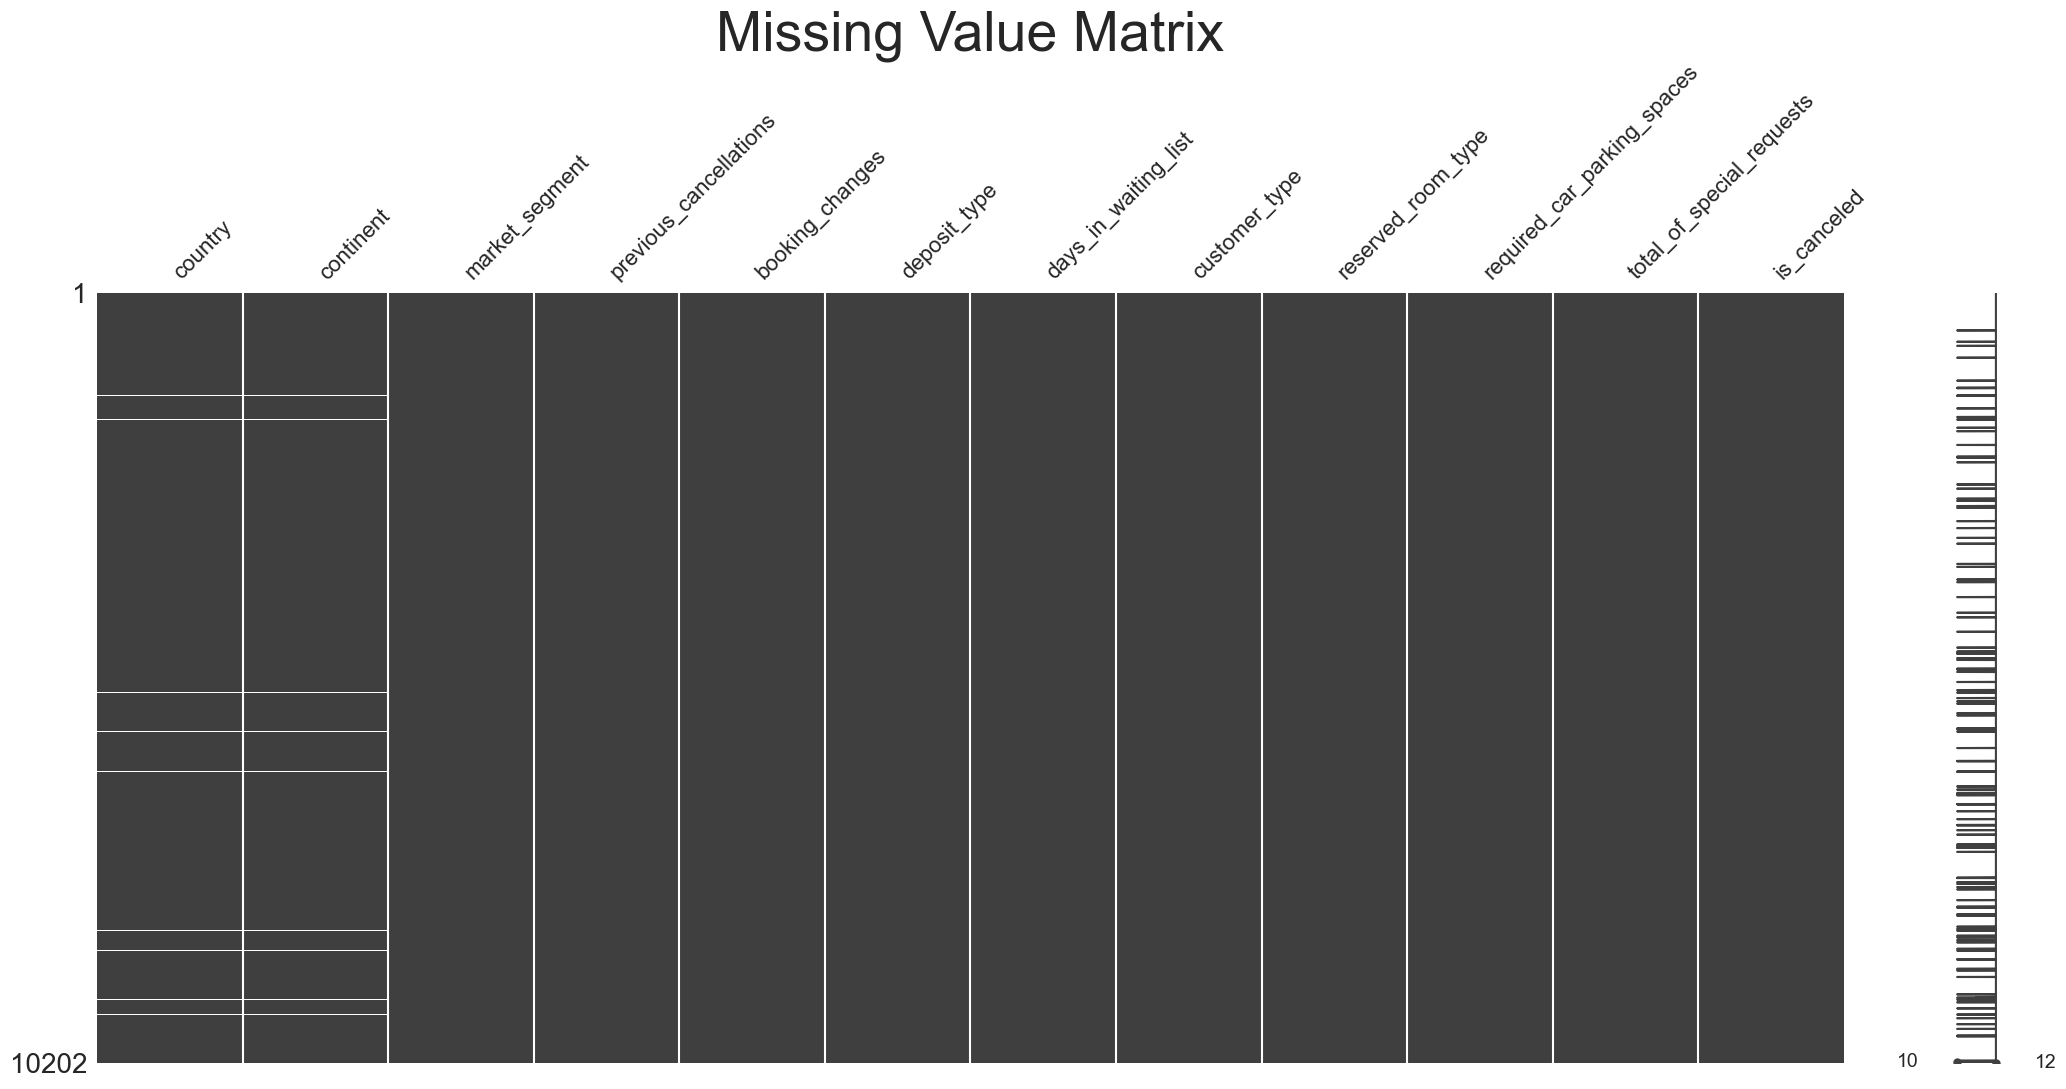

In [1039]:
msno.matrix(df)
plt.title('Missing Value Matrix', size = 40)
plt.show()

In [1040]:
df.isna().sum()

country                        118
continent                      118
market_segment                 1  
previous_cancellations         0  
booking_changes                0  
deposit_type                   0  
days_in_waiting_list           0  
customer_type                  0  
reserved_room_type             0  
required_car_parking_spaces    0  
total_of_special_requests      0  
is_canceled                    0  
dtype: int64

Berdasarkan grafik dan tabel diatas, dapat dilihat missing value terdapat pada 3 kolom yaitu country, continent dan market_segment. Penangan missing value akan dilakukan pada tahap preprocessing.

## Exploratory Data Analysis

In [1041]:
df['is_canceled'].value_counts()

0    7788
1    2414
Name: is_canceled, dtype: int64

In [1042]:
sns.set_style("darkgrid")

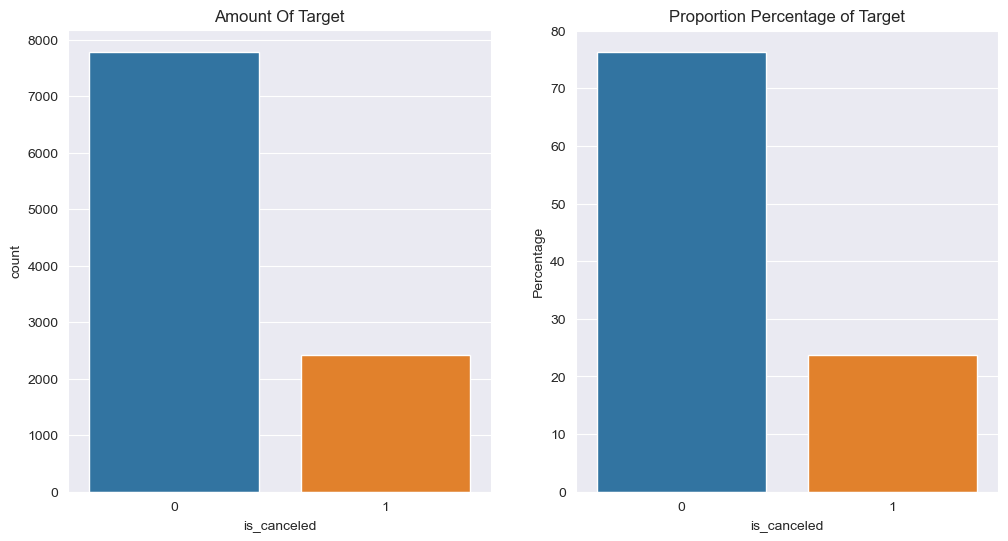

In [1043]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(data=df, x='is_canceled')
plt.title('Amount Of Target')
plt.subplot(122)
sns.barplot (y=[df['is_canceled'].value_counts()[0]/len(df)*100,
                df['is_canceled'].value_counts()[1]/len(df)*100],
             x=[0,1])
plt.ylabel('Percentage')
plt.xlabel('is_canceled')
plt.title('Proportion Percentage of Target')
plt.show()

In [1044]:
display(
    df['is_canceled'].value_counts()[0]/len(df)*100,
    df['is_canceled'].value_counts()[1]/len(df)*100
)

76.33797294648107

23.66202705351892

Berdasarkan Grafik diatas, dapat disimpulkan bahwa :
- Proporsi Variable is_canceled / target tidak balance (imbalance). Terdapat proporsi 24 % pelanggan yang membatalkan pemesanan / reservasi kamar dan 76% pelanggan yang jadi menginap atau bermalam di hotel pada dataset ini.

In [1045]:
feat_num = df.describe().columns
feat_num

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests',
       'is_canceled'],
      dtype='object')

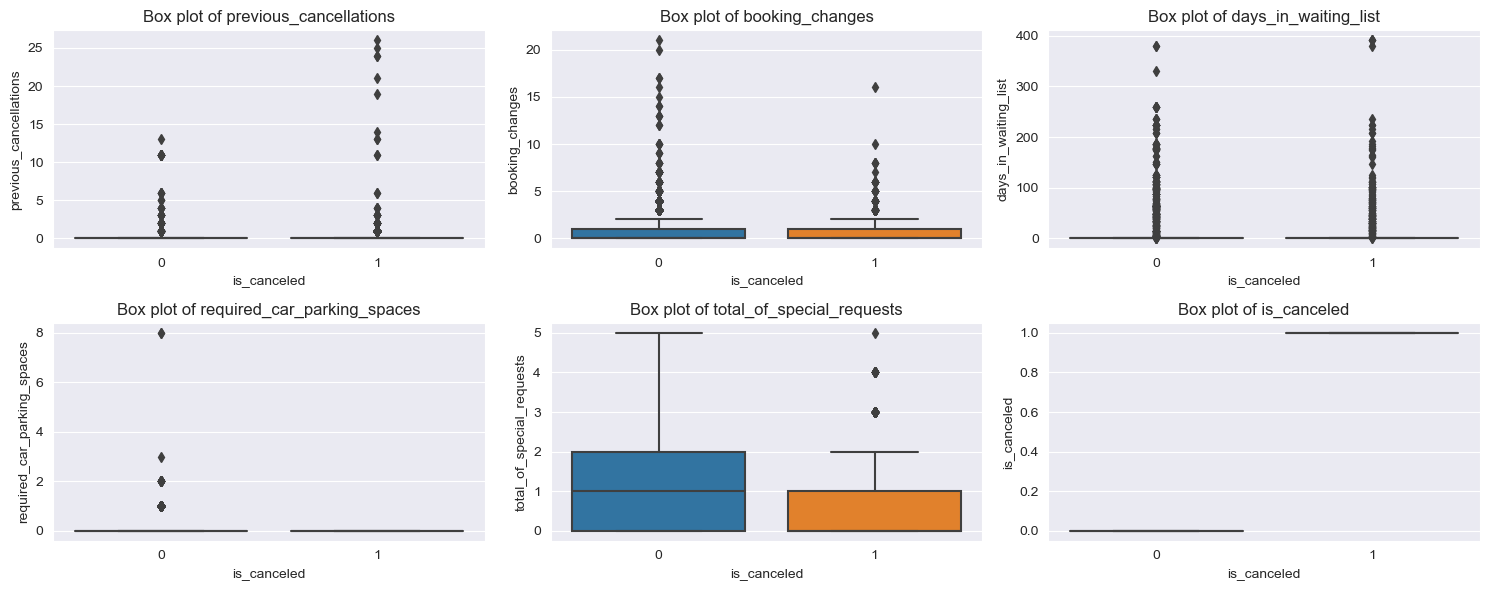

In [1046]:
plt.figure(figsize=(15,6))
for i in range(len(feat_num)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df, y=feat_num[i], x='is_canceled')
    plt.title ('Box plot of '+ feat_num[i])

plt.tight_layout()
plt.show()
    

Berdasarkan Box plot diatas, dapat dilihat persebaran data untuk masing-masing variable numerical. Untuk Outliers akan dipertahankan karena data masih valid atau nilainya masih masuk akal.

<AxesSubplot:xlabel='booking_changes', ylabel='Count'>

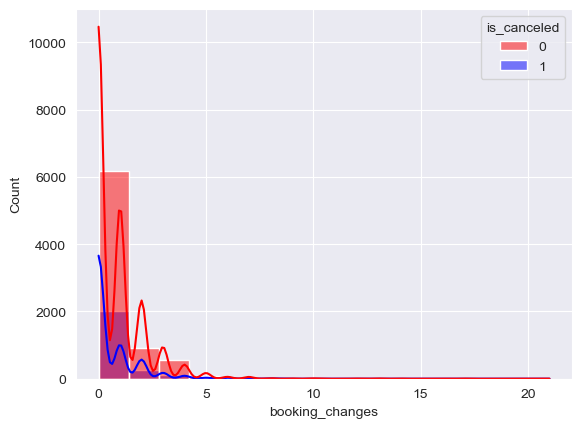

In [1060]:
sns.histplot(data=df, x='booking_changes', kde=True, bins=15, hue='is_canceled',palette=['red','blue'])

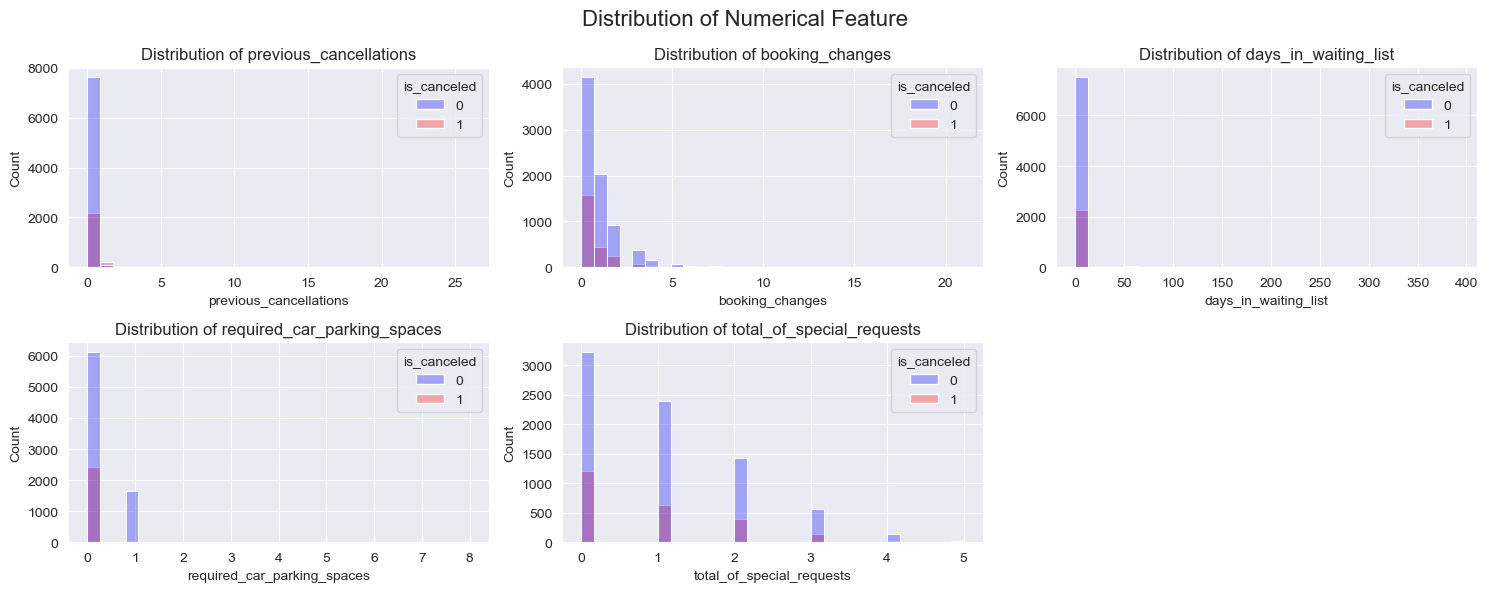

In [1083]:
plt.figure(figsize=(15,6))
for i in range(len(feat_num)-1):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df, x=feat_num[i], bins=30, hue='is_canceled', palette=['blue','red'],alpha=0.3)
    plt.title ('Distribution of '+ feat_num[i])

plt.suptitle('Distribution of Numerical Feature',size=16)
plt.tight_layout()
    

Di atas merupakan histogram untuk varible numerikal, dapat dilihat bahwa semua data memiliki persebaran tidak normal. Data juga tergolong Right Skewed atau cenderung makin mengecil ke kanan (semakin besar nilainya). Kebanyakan data tersebar banyak pada bagian kiri (nilai kecil). Maka pendekatan tidak menggunakan nilai rata-rata melainkan nilai median.

In [831]:
feat_num2=feat_num.drop('days_in_waiting_list')

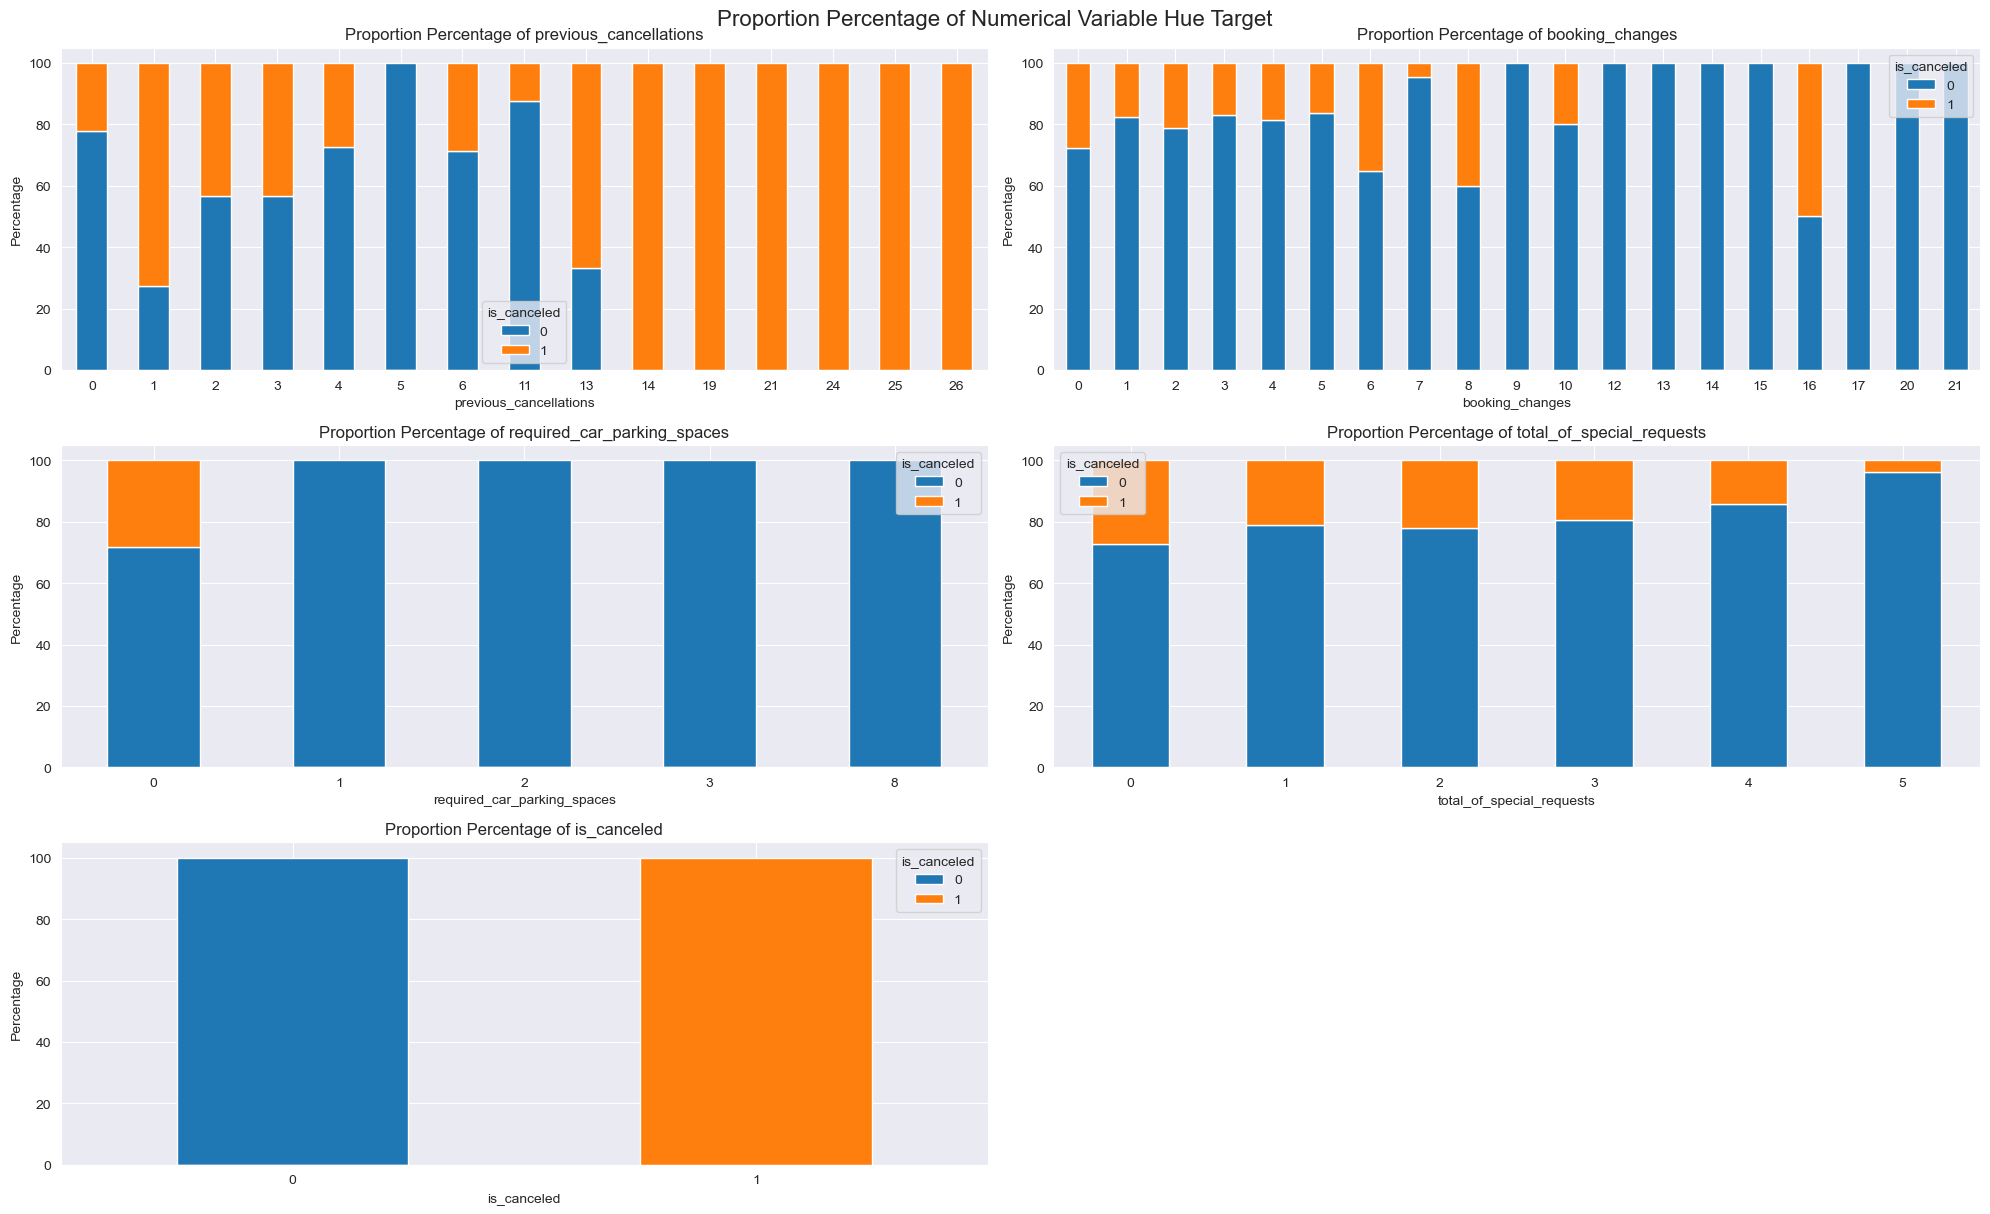

In [832]:
count = 0
fig = plt.figure(figsize=(20,16))

for i in range(len(feat_num2)):
    count +=1
    ax= plt.subplot(4,2,count)
    (pd.crosstab(df[feat_num2[i]],df['is_canceled'],normalize=0)*100).plot(kind='bar',stacked=True,ax=ax)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.title('Proportion Percentage of '+ feat_num2[i])

plt.suptitle('Proportion Percentage of Numerical Variable Hue Target', size=16)
plt.tight_layout()
plt.show()

Bedasarkan grafik diatas, dapat disimpulkan bahwa :
- previous_cancellations
    - pelanggan yang sebelumnya pernah melakukan pembatalan reservasi diatas 14 kali selalu membatalkan reservasi kamar.
- booking_changes
    - pelanggan yang pernah mengubah reservasi sebanyak 12, 13, 14, 15, 17, 20 dan 21 tidak pernah membatalkan reservasi.
    - pelanggan selain yang disebutkan diatas, ada yang membatalkan reservasi.
- required_car_parking_spaces
    - pelanggan yang memerlukan parkiran mobil tidak pernah membatalkan reservasi kamar
- total_of_special_request
    - semakin banyak permintaan tambahan oleh pelanggan, semakin kecil persentase pelanggan membatalkan reservasi

In [833]:
pd.crosstab(df[feat_num[0]],df['is_canceled'])

is_canceled,0,1
previous_cancellations,,
0,7641,2171
1,73,194
2,30,23
3,13,10
4,8,3
5,3,0
6,5,2
11,14,2
13,1,2


In [834]:
pd.crosstab(df[feat_num[1]],df['is_canceled'])

is_canceled,0,1
booking_changes,,
0,4152,1584
1,2035,438
2,923,246
3,376,76
4,166,38
5,67,13
6,22,12
7,21,1
8,6,4


In [835]:
pd.crosstab(df[feat_num[2]],df['is_canceled'])

is_canceled,0,1
days_in_waiting_list,,
0,7485,2252
1,5,2
2,2,0
3,0,2
4,11,2
...,...,...
236,3,1
259,6,0
330,1,0


In [836]:
pd.crosstab(df[feat_num[3]],df['is_canceled'])

is_canceled,0,1
required_car_parking_spaces,,
0,6121,2414
1,1642,0
2,22,0
3,1,0
8,2,0


In [837]:
pd.crosstab(df[feat_num[4]],df['is_canceled'])

is_canceled,0,1
total_of_special_requests,,
0,3229,1215
1,2394,639
2,1429,400
3,565,135
4,145,24
5,26,1


In [838]:
pd.crosstab(df[feat_num[5]],df['is_canceled'])

is_canceled,0,1
is_canceled,,
0,7788,0
1,0,2414


In [839]:
feat_cat = df.drop(columns='country').describe(include='object').columns
feat_cat

Index(['continent', 'market_segment', 'deposit_type', 'customer_type',
       'reserved_room_type'],
      dtype='object')

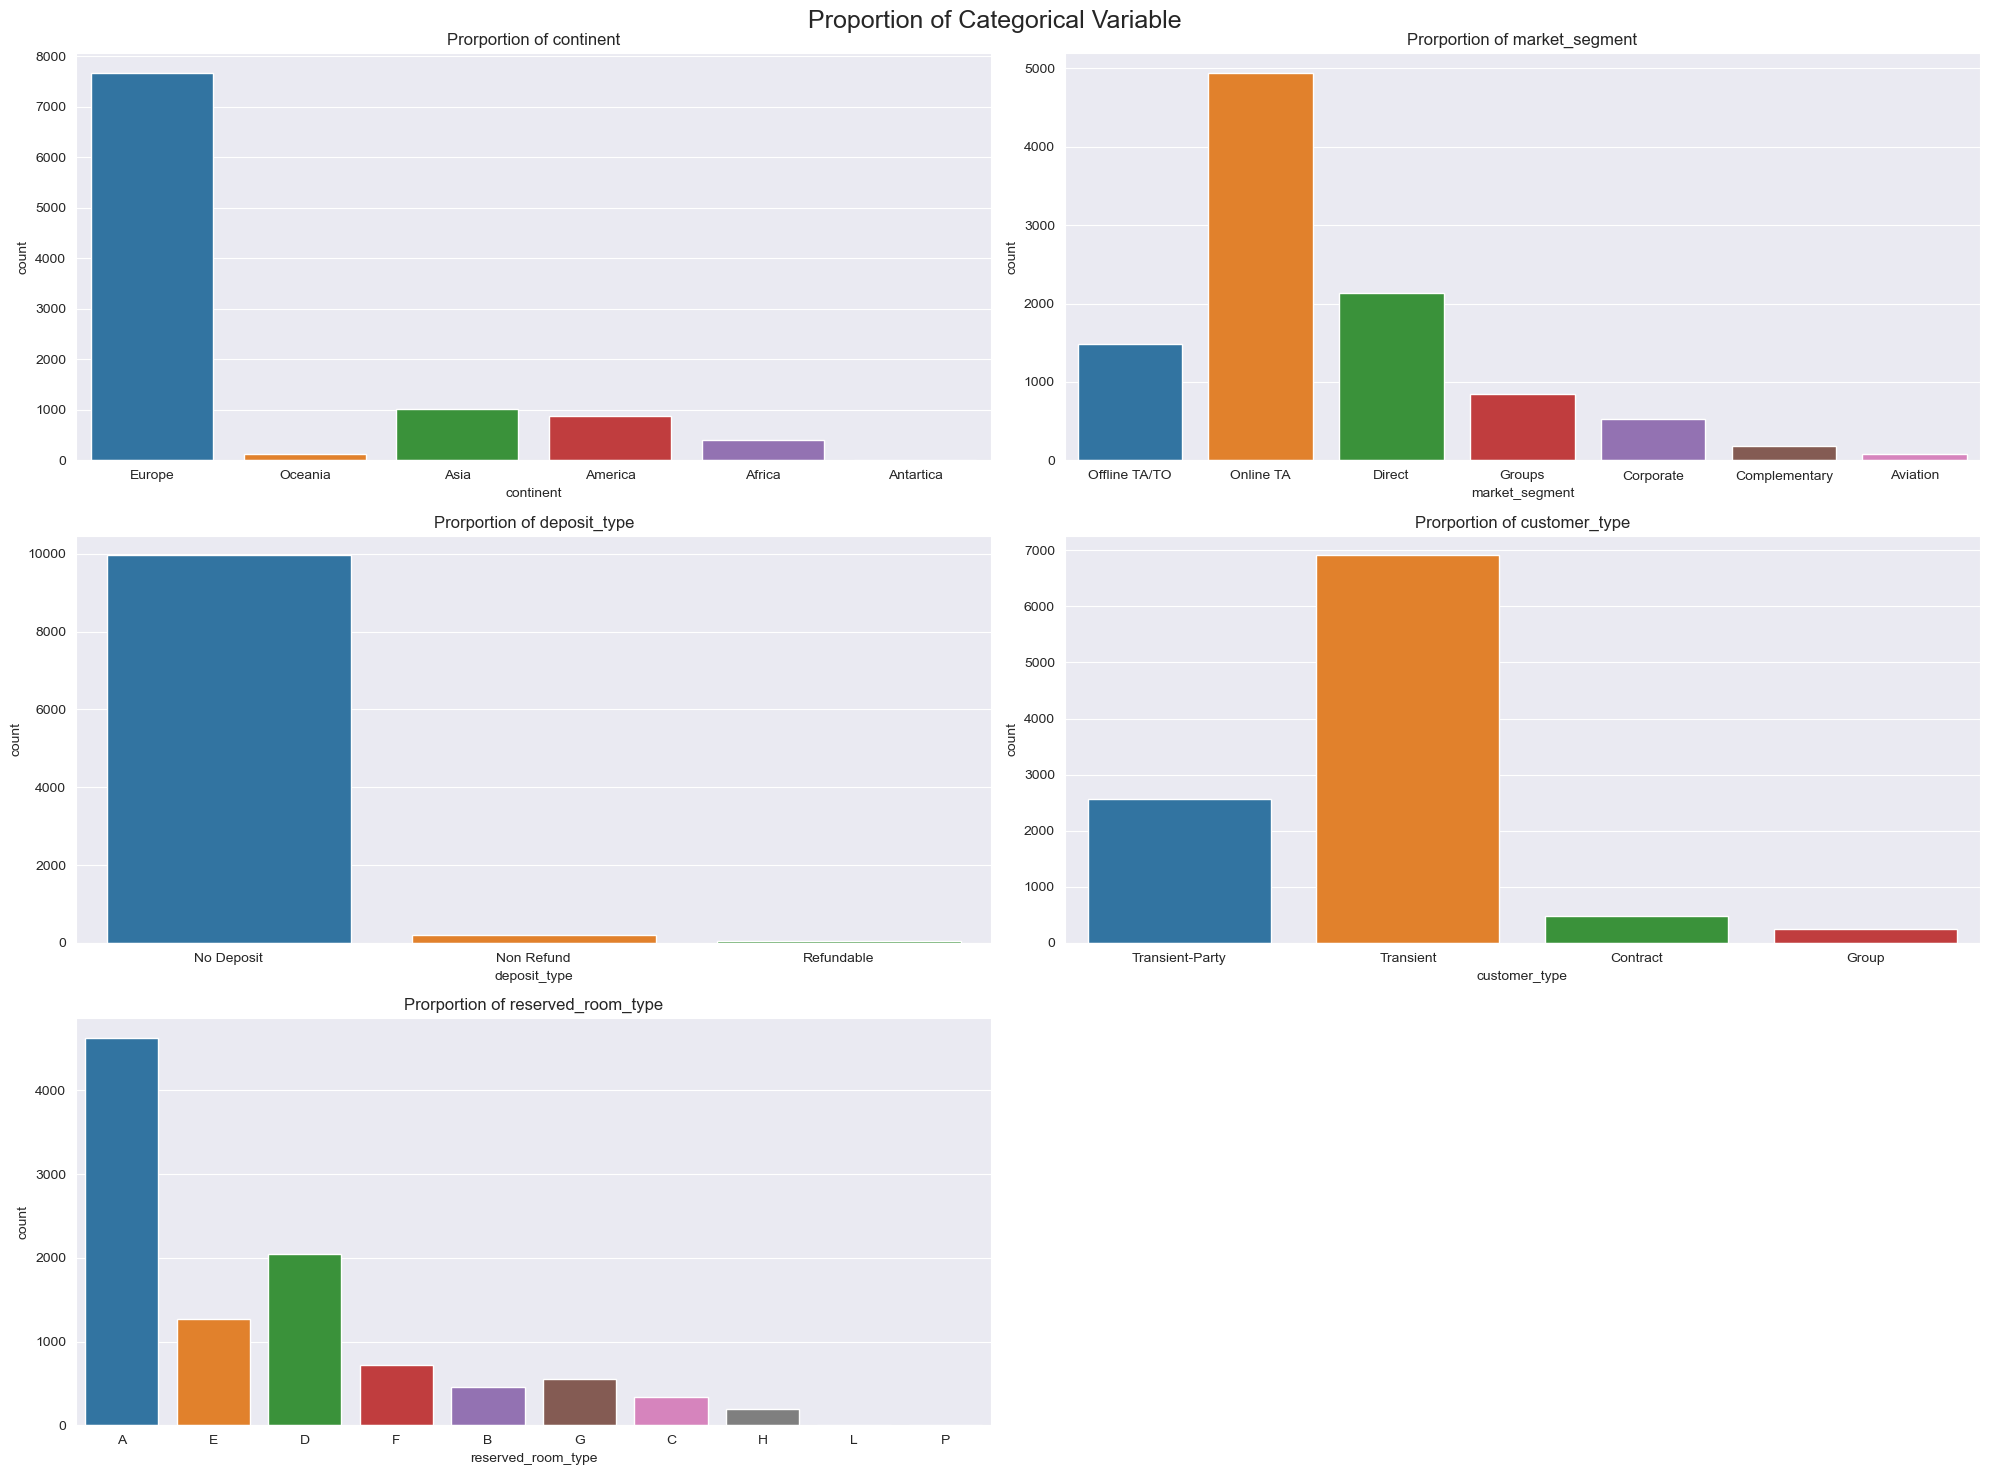

In [840]:
plt.figure(figsize=(20,15))
for i in range(len(feat_cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(data=df, x=feat_cat[i])
    plt.title ('Prorportion of '+ feat_cat[i])
plt.suptitle('Proportion of Categorical Variable',size=18)
plt.tight_layout()
    

Berdasarkan grafik diatas, dapat disimpulkan bahwa:
- Mayoritas pelanggan berasal dari benua Eropa. Hotel berada di negara Portugal yang berasal di benua Eropa jadi mayoritas pelanggan dari benua Eropa karena memiliki jarak yang lebih pendek dibanding dengan benua lainnya.
- Kebanyakan pelanggan dari segmen pasar Online Travel Agent, Direct / langsung menghubungi ke hotel dan Offline Travel Agent
- Hampir semua pelanggan tidak menaruh deposit
- Kebanyakan pelanggan termasuk kategori Transient atau bermalam yang tergolong relatif tidak panjang
- Tipe kamar yang paling sering digunakan adalah Tipe A lalu diikuti tipe kamar D dan E

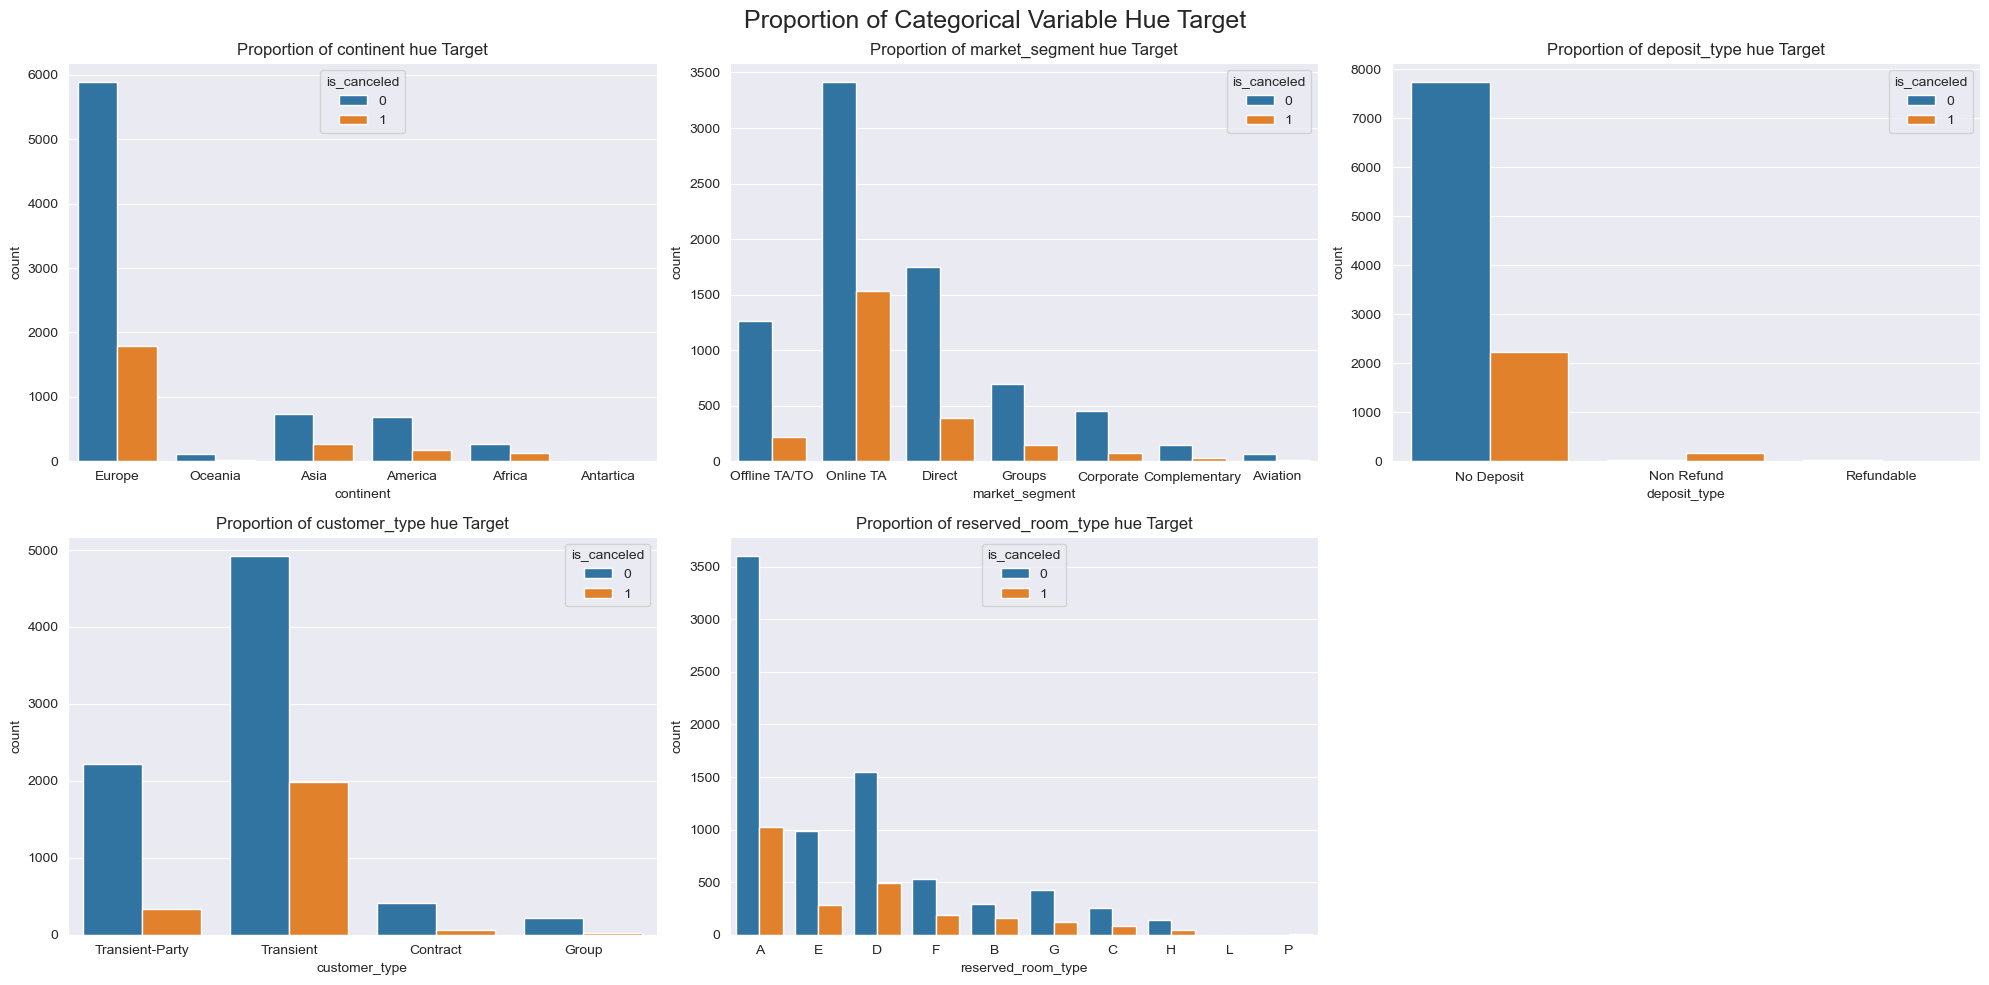

In [1055]:
plt.figure(figsize=(20,10))
for i in range(len(feat_cat)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=feat_cat[i], hue='is_canceled')
    plt.title ('Proportion of '+ feat_cat[i] +' hue Target')
plt.suptitle('Proportion of Categorical Variable Hue Target',size=18)
plt.tight_layout()
    

Berdasarkan grafik diatas, dapat disimpulkan bahwa :
- continent
    - Pelanggan dari benua Africa memiliki persentase proporsi membatalkan reservasi hotel paling tinggi yaitu 34 %.
    - Pelanggan dari benua Oceania memiliki persentase proporsi membatalkan reseverasi hotel paling rendah yaitu 16 %.
- market_segment
    - Pelanggan terbanyak berasal dari pangsa pasar Online TA. Pasar Online TA memiliki persentase proporsi membatalkan reservasi hotel paling tinggi yaitu 31 %
    - Pelanggan dari pangsa pasar selain Online TA memiliki persentase proporsi yang mirip sekitar 14-20%.
- deposit_type
    - Pelanggan yang melakukan refund dan tidak bisa refund memiliki persentase proporsi membatalkan reservasi hotel sangat tinggi yaitu 89 %. Pelanggan kehilangan biaya deposit karena tidak bisa dikembalikan / refund
- customer_type
    - Tipe pelanggan 'Transient' atau yang bermalam dalam periode waktu pendek yang paling sering membatalkan reservasi hotel
- reserved_room_type
    - Proporsi tipe kamar yang dibatalkan reservasi terbagi rata pada semua tipe kamar

Untuk nilai persentase proporsi yang lebih dalam, dapat dilihat pada crosstab dibawah ini untuk seluruh variabel kategorikal.

In [842]:
display(
    pd.crosstab(df[feat_cat[0]],df['is_canceled']),
    pd.crosstab(df[feat_cat[0]],df['is_canceled'],normalize=0)*100,
)

is_canceled,0,1
continent,,
Africa,263,135
America,693,183
Antartica,1,0
Asia,739,268
Europe,5880,1789
Oceania,112,21


is_canceled,0,1
continent,,
Africa,66.080402,33.919598
America,79.109589,20.890411
Antartica,100.000000,0.000000
Asia,73.386296,26.613704
Europe,76.672317,23.327683
Oceania,84.210526,15.789474


In [843]:
display(
    pd.crosstab(df[feat_cat[1]],df['is_canceled']),
    pd.crosstab(df[feat_cat[1]],df['is_canceled'],normalize=0)*100,
)

is_canceled,0,1
market_segment,,
Aviation,64,17
Complementary,152,29
Corporate,452,76
Direct,1748,388
Groups,699,149
Offline TA/TO,1262,220
Online TA,3411,1534


is_canceled,0,1
market_segment,,
Aviation,79.012346,20.987654
Complementary,83.977901,16.022099
Corporate,85.606061,14.393939
Direct,81.835206,18.164794
Groups,82.429245,17.570755
Offline TA/TO,85.155196,14.844804
Online TA,68.978766,31.021234


In [844]:
display(
    pd.crosstab(df[feat_cat[2]],df['is_canceled']),
    pd.crosstab(df[feat_cat[2]],df['is_canceled'],normalize=0)*100,
)

is_canceled,0,1
deposit_type,,
No Deposit,7734,2226
Non Refund,21,174
Refundable,33,14


is_canceled,0,1
deposit_type,,
No Deposit,77.650602,22.349398
Non Refund,10.769231,89.230769
Refundable,70.212766,29.787234


In [845]:
display(
    pd.crosstab(df[feat_cat[3]],df['is_canceled']),
    pd.crosstab(df[feat_cat[3]],df['is_canceled'],normalize=0)*100,
)

is_canceled,0,1
customer_type,,
Contract,418,63
Group,223,21
Transient,4924,1987
Transient-Party,2223,343


is_canceled,0,1
customer_type,,
Contract,86.902287,13.097713
Group,91.393443,8.606557
Transient,71.248734,28.751266
Transient-Party,86.632892,13.367108


In [846]:
display(
    pd.crosstab(df[feat_cat[4]],df['is_canceled']),
    pd.crosstab(df[feat_cat[4]],df['is_canceled'],normalize=0)*100,
)

is_canceled,0,1
reserved_room_type,,
A,3602,1025
B,292,162
C,259,81
D,1544,498
E,986,282
F,532,188
G,431,122
H,141,51
L,1,1


is_canceled,0,1
reserved_room_type,,
A,77.847417,22.152583
B,64.317181,35.682819
C,76.176471,23.823529
D,75.612145,24.387855
E,77.760252,22.239748
F,73.888889,26.111111
G,77.938517,22.061483
H,73.437500,26.562500
L,50.000000,50.000000


In [847]:
pd.crosstab(df['country'],df['is_canceled']).sort_values(1,ascending=False).head(5)

is_canceled,0,1
country,,
PRT,1261,732
ESP,519,122
GBR,614,120
FRA,512,100
IRL,273,82


In [848]:
matrix = np.triu(df.corr())

menggunakan method spearman karena data numerikal berdistribusi tidak normal

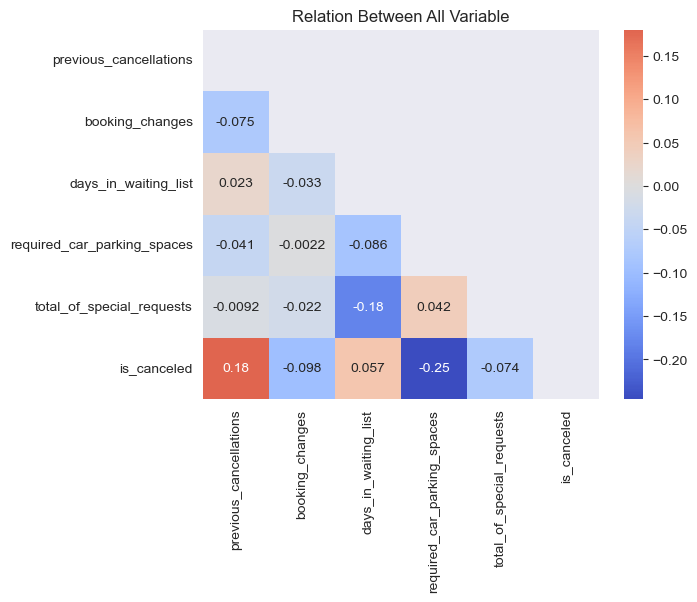

In [849]:
sns.heatmap(
    data=df.corr(method='spearman'),
    annot=True,
    cmap = 'coolwarm',      
    center = 0,
    mask=matrix )

plt.title('Relation Between All Variable')
plt.show()

Berdasarkan grafik diatas, dapat disimpulkan bahwa :
- Nilai korelasi dari semua variabel numerikal pada dataset ini memiliki nilai korelasi kecil atau memiliki hubungan korelasi yang sangat kecil 
- Variabel yang memiliki korelasi tertinggi dengan target adalah variabel required_car_parking_spaces. Hubungan required_car_parking_spaces dengan is_canceled Low Correlation Negative. Semakin banyak jumlah tempat parkir yang diperlukan oleh pelanggan maka pelanggan cenderung akan jadi bermalam / menginap di hotel (target bernilai 0)

## Define X and y

In [96]:
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

X merupakan semua kolom yang terdapat pada dataframe df kecuali kolom 'is_canceled'. X akan sebagai variabel yang diuji pada machine learning ini atau nama lainnya Feature. <br>
y merupakan target dari machine learning : kolom 'is_canceled'

In [97]:
display(
    y.value_counts()[0]/len(y),
    y.value_counts()[1]/len(y)
)

0.7633797294648108

0.2366202705351892

Data memiliki proporsi nilai target 0 : 76,34 % dan nilai target 1 : 23,66 %

Dataset tidak imbalance 

## Data Splitting

Pada mesin learning, tahap data splitting diperlukan untuk menghindari overfitting (prediksi machine learning pada training set baik namun jelek pada data baru). Kondisi ini dimana mesin terlalu banyak belajar dari training set dan gagal menyesuaikan dengan data baru. Pembagian training set : 80 % data dan test set : 20 % data. Data dipilih secara acak dengan menggunakan random_state = 0.  Stratify y berfungsi untuk menyamakan proporsi target pada training dan test set sesuai dengan proporsi dataset awal.

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

## Data Preprocessing

Data Preprocessing adalah tahapan persiapan data-data feature sebelum dimasukkan ke dalam model Machine Learning. Data yang diterima oleh Machine Learning tidak boleh kosong (missing value) dan data harus berupa numerikal. Ada tiga langkah yang akan dilakukan pada tahap preprocessing yaitu pengisian missing value (imputing), pengubahan kolom berkategori kategorikal menjadi numerikal (encoding) dan pengubahan rentang nilai pada kolom berkategori numerikal (scaling). 

- Imputing<br>
 Langkah pertama yang dilakukan pada tahap ini adalah mengisi data kosong / missing value. Pada dataset ini terdapat 3 kolom yang memiliki mising value yaitu country, continent dan market_segment. Ketiga kolom ini merupakan kolom bernilai kategorikal ordinal maka akan dilakukan pengisian menggunakan nilai modus (most frequency). <br><br>
 Kolom yang akan dimasukkan tahap Imputing : <br>
 Simple Imputer (Mode / Modus) - 'country', 'continent', 'market_segment'
<br><br>
- Encoding<br>
 Langkah kedua yang dilakukan pada tahap ini adalah mengubah kolom yang berkategori kategorikal menjadi numerikal. Kolom kategorikal pada dataset ini berkategori nominal / tidak memiliki tingkatan. Data kategorikal nominal memiliki 2 cara untuk dilakukan proses encoding yaitu Binary Encoding dan One Hot Encoding. 
   - One Hot Encoding : bekerja dengan menambah jumlah kolom baru sesuai dengan jumlah nilai unik pada kolom tersebut dan memberi nama kolom baru sesuai dengan nilai unik dari kolom tsb. Data yang sama dengan kategori kolom baru dibentuk akan bernilai biner 1 sedangkan sisanya akan bernilai biner 0. One Hot Encoding cocok digunakan untuk jumlah kolom yang nilai uniknya tidak banyak. Hasil dari One Hot Encoding juga mudah untuk diintepretasikan. Nilai unik kolom kategorikal yang berjumlah 10 kebawah akan diolah menggunakan One Hot Encoding. Kolom tersebut adalah : market_segment, deposit_type, customer_type, reserved_room_type dan continent
   - Binary Encoding : bekerja dengan memberi pelabelan nilai biner (terdiri dari angka 0 dan 1) sesuai dengan jumlah unik value. Binary Encoding cocok digunakan untuk jumlah kolom yang nilai uniknya banyak karena menghasilkan kolom baru yang lebih sedikit daripada One Hot Encoding. Kelemahannya Binary Encoding susah untuk diintepretasikan. Kolom kategorikal yang akan diolah menggunakan Binary Encoding adalah kolom country karena memiliki nilai unik yang sangat banyak (terdapat 162 nilai unik)<br><br>
Kolom yang akan dimasukkan Binary Encoding : 'country' <br>
Kolom yang akan dimasukkan Onehot Encoding : 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type', 'continent'
<br><br>
- Scaling<br>
 Langkah ketiga yang dilakukan pada tahap ini adalah mengubah rentang nilai pada kolom numerikal. Scaling adalah proses normalisasi rentang nilai data numerikal. Data yang bernilai besar akan dianggap bernilai lebih tinggi daripada data bernilai kecil oleh model machine learning apabila tidak dilakukan proses scaling. Hal ini bertujuan untuk memastikan semua kolom / data numerikal diperlakukan sama dan mencegah model menganggap data numerikal bernilai tinggi berdampak lebih besar. Ada 3 Scaling yang digunakan yaitu, Standard Scaling, Min Max Scaling dan Robust Scaling. Pada langkah ini semua kolom akan dimasukkan menggunakan Robust Scaling terlebih dahulu namun Scaling akan dilakukan tuning pada proses Hyperparameter Tuning. Robust dipilih karena cocok untuk menangani data yang memiliki outlier
   - Standard Scaling : membuat rata-rata menjadi 0 dan variansi menjadi 1
   - Min Max Scaling : menyesuaikan data menjadi dalam rentang 0 - 1 sesuai nilai minimum dan maksimum. Nilai minimum akan menjadi 0 dan nilai maksimum akan menjadi 1. Tidak direkomendasikan untuk data yang memiliki outlier.
   - Robust Scaling : membuat median data menjadi 0 dan InterQuartile (Q3 - Q1) menjadi 1<br><br>
Kolom yang akan diolah Robust Scaling :  'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests'

Column Transformer merupakan function yang digunakan untuk memproses ketiga tahap diatas sekaligus dengan tahap dan kolom yang berbeda. Pipeline merupakan proses transformasi untuk kolom yang memiliki lebih dari 1 tahapan. Pipeline akan dimasukkan ke dalam Column Transformer sehingga kita bisa melakukan transformasi 3 tahap pada kolom yang diinginkan dengan sekali fitting saja.

In [102]:
pipe_imp_mode_binary=Pipeline([
    ('imp_mode',SimpleImputer(strategy='most_frequent')),
    ('binary', BinaryEncoder())
])

Pipeline Imputer Mode Binary : Terdapat 2 tahap pada pipeline ini yaitu Simple Imputing dengan most_frequent dan Binary Encoding.

In [103]:
pipe_imp_mode_onehot=Pipeline([
    ('imp_mode',SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Pipeline Imputer Mode Onehot : Terdapat 2 tahap pada pipeline ini yaitu Simple Imputing dengan most_frequent dan One Hot Encoding.

handle_unknown pada OneHotEncoder bertujuan untuk data yang tidak terdapat kategori yg dibentuk oleh one hot enconder saat proses transformasi maka akan mengisi nilai 0 pada semua kolom

In [104]:
transformer = ColumnTransformer([
    ('pipe_imp_mode_binary', pipe_imp_mode_binary, ['country']),
    ('pipe_imp_mode_onehot', pipe_imp_mode_onehot, ['continent','market_segment']),
    ('onehot',OneHotEncoder(handle_unknown='ignore'), ['deposit_type', 'customer_type', 'reserved_room_type']),
    ('robust', RobustScaler(), ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests'])
], remainder='passthrough')

Kolom yang terdapat pada tahap : 
- pipe_imp_mode_binary : kolom country
- pipe_imp_mode_onehot : kolom continent dan market segment
- onehot : kolom deposit type, customer_type dan reserved_room_type
- robust : kolom previous cancellations, booking_changes, days_in_waiting_list, required_car_parking_space dan total_of_special_request

In [105]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_imp_mode_binary',
                                 Pipeline(steps=[('imp_mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary', BinaryEncoder())]),
                                 ['country']),
                                ('pipe_imp_mode_onehot',
                                 Pipeline(steps=[('imp_mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['continent', 'market_segment']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['deposit_type', 'customer_type',
                                  'reserved_room_type']),
                                ('robust', RobustScaler(),
                                 ['previous_cancellations', 'booking_changes',
                                  'days_in_waiting_list',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests'])])

## Cross Validation

Validasi digunakan untuk proses validasi dan generalisasi. Pada data Training set (80%) akan dilakukan Validasi silang untuk mencari algoritma dengan nilai terbaik. Validasi dilakukan dengan 5-Fold Cross Validation. Dilakukan 5x validasi dengan data training set dibagi menjadi 5 bagian lalu data pertama akan menjadi validasi pertama hingga data kelima akan menjadi validasi kelima. Terdapat 3 nilai scoring untuk binary klasifikasi machine learning yaitu precision (False Positive), recall (False Negative) dan F1 (memperhatikan FP dan FN). Pada masalah dataset ini, akan digunakan scoring Recall karena kita ingin mengurangi potensi kerugian hotel akibat pelanggan yang diprediksi akan menginap di hotel namun sebenarnya membatalkan reservasi atau tidak jadi datang.

Ada 8 Algoritma yang akan diuji pada tahap Cross Validation yaitu :
- Logistic Regression
- KNN Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Ada Boost Classifier
- Gradient Boosting Classifier
- XGB Classifier
- LGBM Classifier

Kesembilan algoritma ini menggunakan default parameter dengan random state semua yang sama (random_state = 0) dan penambahan parameter class_weigth=balanced karena dataset imbalance

In [107]:
# import library algoritma
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# XG Boost
from xgboost.sklearn import XGBClassifier 
# Ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble similar type
from sklearn.ensemble import RandomForestClassifier      # Bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting  

from lightgbm import LGBMClassifier

In [201]:
logreg = LogisticRegression(random_state=0, class_weight='balanced')
knn = KNeighborsClassifier(n_neighbors=5) 
tree = DecisionTreeClassifier(random_state=0, max_depth=5, class_weight='balanced')

# Random Forest
forest = RandomForestClassifier(random_state=0, class_weight='balanced') 

# Ada Boost
adaboost = AdaBoostClassifier(random_state=0)

# Gradient Boost
gboost = GradientBoostingClassifier(random_state=0)

# XGBoost
xgboost = XGBClassifier(random_state=0)

# lgbm
lgbm = LGBMClassifier(random_state=0, class_weight='balanced')

In [109]:
from sklearn.metrics import make_scorer, fbeta_score

# buat scoring f2 score (recall lebih penting dari pada precision, tapi tetap memperhatikan keduanya)
f2 = make_scorer(fbeta_score, beta=2)

# buat scoring f0.5 score (precision lebih penting dari pada rcall, tapi tetap memperhatikan keduanya)
f_setengah = make_scorer(fbeta_score, beta=0.5)

F2 score merupakan scoring yang akan digunakan pada permasalahan ini. Permasalahan utama lebih dibebankan pada False Negative tapi tetap memperhatikan False Positive.

In [513]:
# Pilihan model
models = [logreg, tree,knn, forest, adaboost, gboost, xgboost, lgbm ]
algo = []
cv_scoring = []
list_algo = ['Logistic Regression', 'DecisionTreeClassifier','KNeighborsClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier' ]
list_cv_scoring = ['F1', 'F2','F_setengah']
cv_mean = []
cv_std = []
cv_all = []
list_cv = ['f1',f2, f_setengah]
skfold = StratifiedKFold(n_splits=5)

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for i in range(len(models)):
    for j in range(len(list_cv)):
        model_pipe = Pipeline([
            ('prep', transformer), 
            ('model', models[i])])
        
        model_cv = cross_val_score(
            model_pipe, 
            X_train, 
            y_train, 
            cv = skfold, 
            scoring = list_cv[j],
            n_jobs=-1,
            error_score='raise'
            )
        algo.append(list_algo[i])
        cv_scoring.append(list_cv_scoring[j])
        cv_mean.append(model_cv.mean())
        cv_std.append(model_cv.std())
        cv_all.append(model_cv.round(4))

In [514]:
df_cv = pd.DataFrame({
    'algo': algo,
    'scoring': cv_scoring,
    'mean': cv_mean,
    'std': cv_std,
    'all': cv_all
})
display(
    df_cv[df_cv['scoring']=='F_setengah'].sort_values('mean', ascending=False),
    df_cv[df_cv['scoring']=='F2'].sort_values('mean', ascending=False),
    df_cv[df_cv['scoring']=='F1'].sort_values('mean', ascending=False)
)

,algo,scoring,mean,std,all
17,GradientBoostingClassifier,F_setengah,0.509229,0.013193,"[0.5302, 0.4971, 0.5058, 0.5178, 0.4952]"
14,AdaBoostClassifier,F_setengah,0.496701,0.035746,"[0.4825, 0.4711, 0.5103, 0.5598, 0.4598]"
23,LGBMClassifier,F_setengah,0.486742,0.007310,"[0.489, 0.4754, 0.4966, 0.4906, 0.4821]"
20,XGBClassifier,F_setengah,0.483470,0.019599,"[0.5043, 0.4496, 0.4795, 0.5015, 0.4824]"
2,Logistic Regression,F_setengah,0.469073,0.008555,"[0.4797, 0.4592, 0.4674, 0.4782, 0.4608]"
5,DecisionTreeClassifier,F_setengah,0.433501,0.018787,"[0.4697, 0.4305, 0.4206, 0.4173, 0.4295]"
8,KNeighborsClassifier,F_setengah,0.378140,0.029758,"[0.4063, 0.328, 0.4093, 0.3809, 0.3661]"
11,RandomForestClassifier,F_setengah,0.334339,0.026995,"[0.3106, 0.3115, 0.3792, 0.3517, 0.3188]"


,algo,scoring,mean,std,all
22,LGBMClassifier,F2,0.696621,0.008661,"[0.6994, 0.6836, 0.7102, 0.6971, 0.6928]"
4,DecisionTreeClassifier,F2,0.690050,0.012657,"[0.6653, 0.6958, 0.6916, 0.7, 0.6976]"
1,Logistic Regression,F2,0.672102,0.015098,"[0.6932, 0.6582, 0.6523, 0.6822, 0.6746]"
19,XGBClassifier,F2,0.371295,0.018421,"[0.3642, 0.3482, 0.3661, 0.3738, 0.4042]"
13,AdaBoostClassifier,F2,0.340848,0.019005,"[0.324, 0.3257, 0.3422, 0.3764, 0.336]"
10,RandomForestClassifier,F2,0.322298,0.027248,"[0.2924, 0.2992, 0.3667, 0.3384, 0.3148]"
7,KNeighborsClassifier,F2,0.321713,0.022092,"[0.3447, 0.2799, 0.333, 0.3237, 0.3273]"
16,GradientBoostingClassifier,F2,0.304090,0.017062,"[0.3314, 0.2993, 0.3076, 0.2781, 0.3041]"


,algo,scoring,mean,std,all
21,LGBMClassifier,F1,0.573067,0.007940,"[0.5756, 0.5608, 0.5845, 0.5759, 0.5686]"
0,Logistic Regression,F1,0.552494,0.010265,"[0.5671, 0.541, 0.5446, 0.5623, 0.5476]"
3,DecisionTreeClassifier,F1,0.532020,0.010111,"[0.5506, 0.5319, 0.5231, 0.5228, 0.5317]"
18,XGBClassifier,F1,0.419759,0.015824,"[0.423, 0.3925, 0.4152, 0.4283, 0.4398]"
12,AdaBoostClassifier,F1,0.404170,0.024636,"[0.3877, 0.3851, 0.4096, 0.4502, 0.3883]"
15,GradientBoostingClassifier,F1,0.380538,0.015240,"[0.4079, 0.3736, 0.3825, 0.3619, 0.3768]"
6,KNeighborsClassifier,F1,0.347573,0.024954,"[0.373, 0.3021, 0.3672, 0.35, 0.3456]"
9,RandomForestClassifier,F1,0.328190,0.027051,"[0.3012, 0.3052, 0.3728, 0.3449, 0.3168]"


Kita fokus ingin mengecilkan nilai False Negative maka scoring yang kita lihat adalah Recall / F2. Berdasarkan nilai F2 terbesar , algoritma terbaik pada cross validation adalah LGBM Classifier. Kita akan menggunakan algoritma LGBM Classifier pada tahapan berikut.

## Hyperparameter Tuning

Hyperparameter Tuning adalah penentuan parameter terbaik dari algoritma yang digunakan. Tidak hanya algoritma, tahapan pada preprocessing dapat kita tuning (mengubah parameter / tahapan) untuk mencari nilai scoring yang lebih baik. Algoritma yang akan digunakan adalah LGBM Classifier dan XGB Classifier. XGB Classifier memiliki kemiripan dengan LGBM Classifier dan sering digunakan dalam kompentisi machine learning.

**LIGHT GBM**

Light GBM adalah algoritma machine learning yang didasari oleh algoritma Decision Tree (berbasis pohon) dan pendekatan pembelajaran dari Algoritma Gradient Boosting. Algoritma Light GBM terkenal karena kecepatan pengerjaan yang lebih cepat, kemampuan distribusi yang baik,kinerja yang baik dalam memodelkan hubungan kompleks fitur dengan target. Proses utama dalam algoritma Light GBM melibatkan iteratif membangun serangkaian pohon keputusan yang secara bertahap ditingkatkan. Pada setiap iterasi, model berusaha untuk memperbaiki kelemahan model sebelumnya dengan mempelajari residual (selisih antara nilai prediksi dan nilai aktual) dari model sebelumnya. Pohon-pohon ini ditambahkan secara berurutan, dengan setiap pohon berfokus pada memperbaiki kesalahan yang masih ada. Light GBM membagi pohon 'leaf-wise' melainkan algoritma boosting lain yang berbasis decision tree menggunakan 'level-wise'. Dalam kata lain, pohon Light GBM berkembang secara vertikal sedangkan algoritma berbasis decision tree lain secara horisontal.

Keuntungan Light GBM:
- Waktu pelatihan lebih cepat dan efisiensi lebih tinggi
- Penggunaan memory yang lebih sedikit (mengganti variable continous menjadi discrete bins)
- Akurasi lebih baik dari algoritma boosting lainnya
- Cocok digunakan untuk dataset besar

Kelemahan Light GBM:
- Cenderung Overfitting

Parameter yang dituning :
- n_estimator (jumlah pohon) = 100,200,300,400
- max_depth (kedalaman pohon) = 4,5,6,7,8,9,10,11
- num_leaves (jumlah daun) = 10,50,150,250,500,1000
- learning_rate = 0.01,0.06,0.11,0.16,0.21,0.26,0.31,0.36,0.41,0.46
- boosting_type = 'gbdt', 'dart'

Penentuan parameter diatas untuk meningkatkan akurasi berdasarkan dokumentasi dari lightgbm. 
sumber : https://lightgbm.readthedocs.io/en/v3.3.2/Parameters-Tuning.html

Lalu untuk scaling akan dituning juga 3 scaler yang bisa digunakan yaitu, Standard Scaling, Min Max Scaling dan Robust Scaling. Ketiga scaling ini bisa digunakan tapi kami ingin melihat nilai scoring mana yang lebih baik.

Untuk encoding akan dilakukan tuning dengan 2 encoding yang bisa digunakan yaitu One Hot Encoding dan Binary Encoding.

Dikarenakan data imbalance maka akan dituning untuk sampling. Ada 5 metode yang akan dituning yaitu None / tidak menggunakan metode sampling, RandomUnderSampling, RandomOverSampling, SMOTE dan NearMiss. RandomUnderSampling untuk mengurangi jumlah baris duplikat secara acak pada target yang majority agar proporsi target sama. RandomOverSampling untuk menambahkan jumlah baris duplikat secara acak pada target yang minority agar proprosi target sama. SMOTE adalah metode oversampling untuk menambahkan jumlah baris dengan membuat replikasi data dari data minoritas. Nearmiss adalah metode undersampling dengan mengurangi jumlah kelas mayoritas agar seimbang dengan kelas minoritas. Data yang dihapus dari kelas mayoritas adalah data yang memiliki jarak paling dekat dengan kelas minoritas.

Berdasarkan jumlah parameter yang hendak dituning, terdapat 115.200 kombinasi

In [ ]:
list_resampling = [None,RandomOverSampler(random_state=0), RandomUnderSampler(random_state=0), SMOTE(random_state=0), NearMiss()]

In [ ]:
resampling = None
lgbm = LGBMClassifier(random_state=0, class_weight='balanced')

# untuk param_grid
hyperparam = {
    'modeling__num_leaves': [10,50,150,250,500,1000],
    'modeling__n_estimators' : range(100,500,100),
    'modeling__max_depth': [4,5,6,7,8,9,10,11],
    'modeling__learning_rate': np.arange(0.01,0.5,0.05),
    'modeling__boosting_type': ['gbdt', 'dart'],
    'preprocessing__robust' : [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'preprocessing__pipe_imp_mode_onehot__onehot' : [OneHotEncoder(handle_unknown='ignore'), BinaryEncoder()]
    ,'resampling' : list_resampling

}

# untuk estimator
pipe_model = Pipeline([
        ('resampling',resampling),
        ('preprocessing', transformer),
        ('modeling', lgbm)
    ])

# define gridsearch
gridsearch_lgbm = GridSearchCV(
    estimator= pipe_model,
    param_grid= hyperparam,
    cv = skfold,
    scoring=f2,
    n_jobs= -1
)

In [ ]:
gridsearch_lgbm.fit(X_train, y_train)

c:\Users\Kevin Octa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
230400 fits failed out of a total of 576000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
46080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kevin Octa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kevin Octa\anaconda3\lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Kevin Octa\anaconda3\lib\site-packages\imblearn\pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('resampling', None),
                                       ('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_imp_mode_binary',
                                                                         Pipeline(steps=[('imp_mode',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('binary',
                                                                                          BinaryEncoder())]),
                                                                         ['country']),
                                                                        ('pipe_imp_mode_oneh...
                         'modeling__num_leaves': [10, 50, 150, 250, 500, 1000],
                         'preprocessing__pipe_imp_mode_onehot__onehot': [OneHotEncoder(handle_unknown='ignore'),
                                                                         BinaryEncoder()],
                         'preprocessing__robust': [MinMaxScaler(),
                                                   StandardScaler(),
                                                   RobustScaler()],
                         'resampling': [None, RandomOverSampler(random_state=0),
                                        RandomUnderSampler(random_state=0),
                                        SMOTE(random_state=0), NearMiss()]},
             scoring=make_scorer(fbeta_score, beta=2))

![image.png](attachment:image.png)

Model berhasil dituning dengan waktu 713 menit

In [ ]:
# hasil randomizedsearch

df_lgbm_grid = pd.DataFrame(gridsearch_lgbm.cv_results_).sort_values('rank_test_score')
df_lgbm_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__boosting_type,param_modeling__learning_rate,param_modeling__max_depth,param_modeling__n_estimators,param_modeling__num_leaves,param_preprocessing__pipe_imp_mode_onehot__onehot,...,param_resampling,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
70920,1.493819,0.021880,0.037974,0.004866,dart,0.11,6,300,10,OneHotEncoder(handle_unknown='ignore'),...,None,"{'modeling__boosting_type': 'dart', 'modeling__learning_rate': 0.11, 'modeling__max_depth': 6, 'modeling__n_estimators': 300, 'modeling__num_leaves': 10, 'preprocessing__pipe_imp_mode_onehot__onehot': OneHotEncoder(handle_unknown='ignore'), 'preprocessing__robust': MinMaxScaler(), 'resampling': None}",0.747602,0.713666,0.747201,0.740903,0.723598,0.734594,0.013615,1
70930,1.548345,0.047891,0.035984,0.001649,dart,0.11,6,300,10,OneHotEncoder(handle_unknown='ignore'),...,None,"{'modeling__boosting_type': 'dart', 'modeling__learning_rate': 0.11, 'modeling__max_depth': 6, 'modeling__n_estimators': 300, 'modeling__num_leaves': 10, 'preprocessing__pipe_imp_mode_onehot__onehot': OneHotEncoder(handle_unknown='ignore'), 'preprocessing__robust': RobustScaler(), 'resampling': None}",0.747602,0.713666,0.747201,0.740903,0.723598,0.734594,0.013615,1
70925,1.469303,0.032751,0.034886,0.000832,dart,0.11,6,300,10,OneHotEncoder(handle_unknown='ignore'),...,None,"{'modeling__boosting_type': 'dart', 'modeling__learning_rate': 0.11, 'modeling__max_depth': 6, 'modeling__n_estimators': 300, 'modeling__num_leaves': 10, 'preprocessing__pipe_imp_mode_onehot__onehot': OneHotEncoder(handle_unknown='ignore'), 'preprocessing__robust': StandardScaler(), 'resampling': None}",0.747602,0.713666,0.747201,0.740903,0.723598,0.734594,0.013615,1
75807,0.475778,0.019669,0.035451,0.000773,dart,0.16,5,200,10,BinaryEncoder(),...,RandomUnderSampler(random_state=0),"{'modeling__boosting_type': 'dart', 'modeling__learning_rate': 0.16000000000000003, 'modeling__max_depth': 5, 'modeling__n_estimators': 200, 'modeling__num_leaves': 10, 'preprocessing__pipe_imp_mode_onehot__onehot': BinaryEncoder(), 'preprocessing__robust': RobustScaler(), 'resampling': RandomUnderSampler(random_state=0)}",0.743272,0.724947,0.736170,0.740418,0.728134,0.734588,0.007022,4
75802,0.480728,0.027946,0.037857,0.002963,dart,0.16,5,200,10,BinaryEncoder(),...,RandomUnderSampler(random_state=0),"{'modeling__boosting_type': 'dart', 'modeling__learning_rate': 0.16000000000000003, 'modeling__max_depth': 5, 'modeling__n_estimators': 200, 'modeling__num_leaves': 10, 'preprocessing__pipe_imp_mode_onehot__onehot': BinaryEncoder(), 'preprocessing__robust': StandardScaler(), 'resampling': RandomUnderSampler(random_state=0)}",0.743272,0.724947,0.736170,0.740418,0.728134,0.734588,0.007022,4


In [ ]:
df_lgbm_grid.to_csv('df_lgbm_grid_result.csv')

# untuk menyimpan nilai hasil xgb grid pada excel dalam bentuk csv

In [ ]:
gridsearch_lgbm.best_params_

{'modeling__boosting_type': 'dart',
 'modeling__learning_rate': 0.11,
 'modeling__max_depth': 6,
 'modeling__n_estimators': 300,
 'modeling__num_leaves': 10,
 'preprocessing__pipe_imp_mode_onehot__onehot': OneHotEncoder(handle_unknown='ignore'),
 'preprocessing__robust': MinMaxScaler(),
 'resampling': None}

In [ ]:
gridsearch_lgbm.best_score_

0.7345941243891148

Selain dari LGBM Classifier, terdapat algoritma boosting yang terkenal dengan hasil yang bagus. Algoritma boosting itu adalah XGB Classifier. Oleh karena itu, kita akan coba membandingkan hasil dari algoritma LGBM dan XGB. 

**XGB Classifier**

XGBoost atau Extreme Gradient Boosting adalah sebuah algoritma pada machine learning yang berkinerja baik karena penanganan data yang kuat karena banyak variasi hyperparameter yang dapat disesuaikan. XGBoost dapat digunakan untuk memprediksi target klasifikasi dan regresi. XGBoost termasuk dalam kategori Ensemble Learning. Ensemble Learning adalah sekumpulan pengklasifikasi yang dilatih secara individual dimana hasil prediksi dari setiap pengklasifikasi akan digabungkan dengan beberapa cara seperti rata-rata, pemungutan suara terbanyak dan lain lain untuk menghasilkan prediksi akhir.

Boosting adalah kumpulan dari Decision Tree yang pembangunan pohon berikutnya berdasarkan pohon sebelumnya. Pohon pertama yang dihasilkan oleh XGBoost tergolong lemah lalu dilakukan update bobot pada setiap pohon yang dibangun selanjutnya. Model tree terdiri dari Classification dan Regression trees (CART). Metode XGBoost adalah pengembangan dari GBoost atau Gradient Boosting. XGboost menggunakan model yang lebih teratur untuk membangun sturuktur pohon regresi yang dapat memberikan kinerja lebih baik dan megurangi kompleksitas model. XGboost ini didasari oleh algoritma Decision Tree dalam membangun stuktur pohon dimana Decision Tree hierarki if atau else bedasarkan nilai splitter dari setiap feature. 

3 Parameter utama pada XGBoost adalan learning rate, jumlah pohon dan maximum depth dari setiap pohon. Untuk nilai parameter didasari dari sumber-sumber mengenai XGBoost.
- learning_rate : biasa menggunakan nilai antara 0.01 - 0.2
    learning_rate adalah penentuan sebesar apa algoritma beradaptasi pada terhadap residual / kesalahan dari pohon sebelumnya. Semakin kecil nilai learning rate menghasilkan proses pembelajaran yang lebih bertahap dengan perubahan yang lebih sedikit sedangkan semakin besar nilai learning rate mempercepat proses pembelajaran.
- jumlah pohon / n_estimator : biasa menggunakan nilai 100-400
    n_estimator adalah salah satu parameter penting pada algoritma XGBoost. n_estimator adalah banyaknya jumlah pohon yang dibangun. Semakin banyak jumlah pohon, semakin kompleks model yang dihasilkan namun memiliki waktu pelatihan yang lebih lama. 
- max_depth : biasa menggunakan nilai 3-9
    max_depth juga merupakan salah satu parameter penting pada algoritma XGBoost. max_depth adalah maksimal jumlah dari kedalaman suatu pohon. Semakim dalam jumlah kedalaman semakin kompleks modelnya namun dapat menyebabkan overfitting.
- subsample : biasa menggunakan 0.5-1

Lalu untuk scaling akan dituning juga 3 scaler yang bisa digunakan yaitu, Standard Scaling, Min Max Scaling dan Robust Scaling

Untuk encoding akan dilakukan tuning dengan 2 encoding yang bisa digunakan yaitu One Hot Encoding dan Binary Encoding.

Dikarenakan data imbalance maka akan dituning untuk sampling. Ada 5 metode yang akan dituning yaitu None / tidak menggunakan metode sampling, RandomUnderSampling, RandomOverSampling, SMOTE dan NearMiss. RandomUnderSampling untuk mengurangi jumlah baris duplikat secara acak pada target yang majority agar proporsi target sama. RandomOverSampling untuk menambahkan jumlah baris duplikat secara acak pada target yang minority agar proprosi target sama. SMOTE adalah metode oversampling untuk menambahkan jumlah baris dengan membuat replikasi data dari data minoritas. Nearmiss adalah metode undersampling dengan

Berdasarkan parameter yang hendak dituning, terdapat 84.000 kombinasi.

sumber :

https://ojs.unsulbar.ac.id/index.php/Mathematics/article/download/1792/918/

https://towardsdatascience.com/a-brief-introduction-to-xgboost-3eaee2e3e5d6#:~:text=XGBoost%20vs%20Gradient%20Boosting,can%20be%20parallelized%20across%20clusters.

https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning

In [115]:
resampling = None
xgboost = XGBClassifier(random_state=0)

# untuk param_grid
hyperparam = {
    'modeling__learning_rate': np.arange(0.01,0.21,0.05),
    'modeling__n_estimators' : range(100,500,100),
    'modeling__max_depth': range(3,10),
    'modeling__subsample': np.arange(0.5,1,0.1),
    'modeling__colsample_by_tree' : np.arange(0.5,1,0.1)
    'preprocessing__robust' : [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'preprocessing__pipe_imp_mode_onehot__onehot' : [OneHotEncoder(handle_unknown='ignore'), BinaryEncoder()]
    ,'resampling' : list_resampling

}

# untuk estimator
pipe_model = Pipeline([
        ('resampling',resampling),
        ('preprocessing', transformer),
        ('modeling', xgboost)
    ])

# define gridsearch
gridsearch_xgb = GridSearchCV(
    estimator= pipe_model,
    param_grid= hyperparam,
    cv = 5,
    scoring=f2,
    n_jobs= -1
)


In [116]:
gridsearch_xgb.fit(X_train, y_train)

c:\Users\Kevin Octa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
168000 fits failed out of a total of 420000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kevin Octa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kevin Octa\anaconda3\lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Kevin Octa\anaconda3\lib\site-packages\imblearn\pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resampling', None),
                                       ('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_imp_mode_binary',
                                                                         Pipeline(steps=[('imp_mode',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('binary',
                                                                                          BinaryEncoder())]),
                                                                         ['country']),
                                                                        ('pipe_imp_mode_onehot',
                                                                         Pipeline(steps=[('imp_mode',
                                                                                          SimpleImputer(strategy='mo...
                         'modeling__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'preprocessing__pipe_imp_mode_onehot__onehot': [OneHotEncoder(handle_unknown='ignore'),
                                                                         BinaryEncoder()],
                         'preprocessing__robust': [MinMaxScaler(),
                                                   StandardScaler(),
                                                   RobustScaler()],
                         'resampling': [None, RandomOverSampler(random_state=0),
                                        RandomUnderSampler(random_state=0),
                                        SMOTE(random_state=0), NearMiss()]},
             scoring=make_scorer(fbeta_score, beta=2))

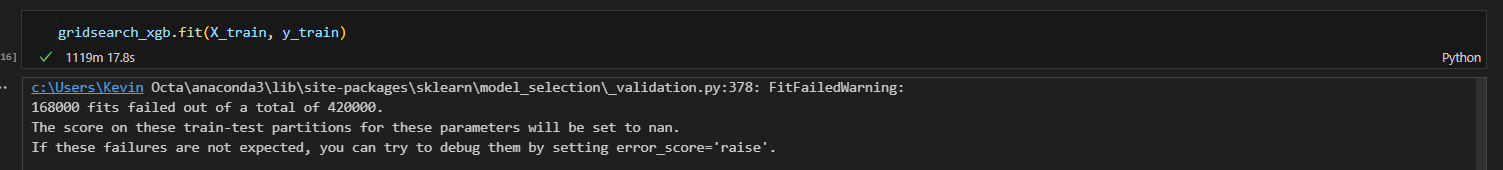

Model berhasil difitting dengan waktu 1119 menit

In [122]:
# hasil randomizedsearch

df_xgb_grid = pd.DataFrame(gridsearch_xgb.cv_results_).sort_values('rank_test_score')
df_xgb_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__colsample_bytree,param_modeling__learning_rate,param_modeling__max_depth,param_modeling__n_estimators,param_modeling__subsample,param_preprocessing__pipe_imp_mode_onehot__onehot,...,param_resampling,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
70302,0.970552,0.031044,0.023721,0.000746,0.9,0.01,8,100,0.8,OneHotEncoder(handle_unknown='ignore'),...,RandomUnderSampler(random_state=0),"{'modeling__colsample_bytree': 0.8999999999999999, 'modeling__learning_rate': 0.01, 'modeling__max_depth': 8, 'modeling__n_estimators': 100, 'modeling__subsample': 0.7999999999999999, 'preprocessing__pipe_imp_mode_onehot__onehot': OneHotEncoder(handle_unknown='ignore'), 'preprocessing__robust': RobustScaler(), 'resampling': RandomUnderSampler(random_state=0)}",0.736105,0.724915,0.730554,0.746587,0.740504,0.735733,0.007544,1
70292,0.970352,0.035404,0.022724,0.000746,0.9,0.01,8,100,0.8,OneHotEncoder(handle_unknown='ignore'),...,RandomUnderSampler(random_state=0),"{'modeling__colsample_bytree': 0.8999999999999999, 'modeling__learning_rate': 0.01, 'modeling__max_depth': 8, 'modeling__n_estimators': 100, 'modeling__subsample': 0.7999999999999999, 'preprocessing__pipe_imp_mode_onehot__onehot': OneHotEncoder(handle_unknown='ignore'), 'preprocessing__robust': MinMaxScaler(), 'resampling': RandomUnderSampler(random_state=0)}",0.736105,0.724915,0.730554,0.746587,0.740504,0.735733,0.007544,1
70297,0.958791,0.030099,0.024119,0.001162,0.9,0.01,8,100,0.8,OneHotEncoder(handle_unknown='ignore'),...,RandomUnderSampler(random_state=0),"{'modeling__colsample_bytree': 0.8999999999999999, 'modeling__learning_rate': 0.01, 'modeling__max_depth': 8, 'modeling__n_estimators': 100, 'modeling__subsample': 0.7999999999999999, 'preprocessing__pipe_imp_mode_onehot__onehot': OneHotEncoder(handle_unknown='ignore'), 'preprocessing__robust': StandardScaler(), 'resampling': RandomUnderSampler(random_state=0)}",0.736105,0.724915,0.730554,0.746587,0.740504,0.735733,0.007544,1
70327,0.912745,0.034181,0.023920,0.001668,0.9,0.01,8,100,0.9,OneHotEncoder(handle_unknown='ignore'),...,RandomUnderSampler(random_state=0),"{'modeling__colsample_bytree': 0.8999999999999999, 'modeling__learning_rate': 0.01, 'modeling__max_depth': 8, 'modeling__n_estimators': 100, 'modeling__subsample': 0.8999999999999999, 'preprocessing__pipe_imp_mode_onehot__onehot': OneHotEncoder(handle_unknown='ignore'), 'preprocessing__robust': StandardScaler(), 'resampling': RandomUnderSampler(random_state=0)}",0.734607,0.723992,0.720120,0.744136,0.733219,0.731215,0.008459,4
70332,0.936864,0.030125,0.023920,0.001410,0.9,0.01,8,100,0.9,OneHotEncoder(handle_unknown='ignore'),...,RandomUnderSampler(random_state=0),"{'modeling__colsample_bytree': 0.8999999999999999, 'modeling__learning_rate': 0.01, 'modeling__max_depth': 8, 'modeling__n_estimators': 100, 'modeling__subsample': 0.8999999999999999, 'preprocessing__pipe_imp_mode_onehot__onehot': OneHotEncoder(handle_unknown='ignore'), 'preprocessing__robust': RobustScaler(), 'resampling': RandomUnderSampler(random_state=0)}",0.734607,0.723992,0.720120,0.744136,0.733219,0.731215,0.008459,4


In [141]:
df_xgb_grid.to_csv('df_xgb_grid_result.csv')

# untuk menyimpan nilai hasil xgb grid pada excel dalam bentuk csv

In [123]:
gridsearch_xgb.best_params_

{'modeling__colsample_bytree': 0.8999999999999999,
 'modeling__learning_rate': 0.01,
 'modeling__max_depth': 8,
 'modeling__n_estimators': 100,
 'modeling__subsample': 0.7999999999999999,
 'preprocessing__pipe_imp_mode_onehot__onehot': OneHotEncoder(handle_unknown='ignore'),
 'preprocessing__robust': MinMaxScaler(),
 'resampling': RandomUnderSampler(random_state=0)}

In [119]:
gridsearch_xgb.best_score_

0.7357330409736118

----

**Perbandingan Sebelum Di Tuning dan Setelah Di Tuning pada Trainset**

Parameter terbaik pada LGBM :

'modeling__boosting_type': 'dart',<br>
'modeling__learning_rate': 0.11,<br>
'modeling__max_depth': 6,<br>
'modeling__n_estimators': 300,<br>
'modeling__num_leaves': 10,<br>
'preprocessing__pipe_imp_mode_onehot__onehot': OneHotEncoder(handle_unknown='ignore'),<br>
'preprocessing__robust': MinMaxScaler(),<br>
'resampling': None


Parameter terbaik pada XGB :

'modeling__colsample_bytree': 0.8999999999999999,<br>
'modeling__learning_rate': 0.01,<br>
'modeling__max_depth': 8,<br>
'modeling__n_estimators': 100,<br>
'modeling__subsample': 0.7999999999999999,<br>
'preprocessing__pipe_imp_mode_onehot__onehot': OneHotEncoder(handle_unknown='ignore'),<br>
'preprocessing__robust': MinMaxScaler(),<br>
'resampling': RandomUnderSampler(random_state=0)

In [1085]:
print ('SEBELUM TUNING TRAINSET ALGORITMA LGBM :')
print ('Nilai Mean F2 score  :', df_cv.loc[22,'mean'].round(3))
print ('Nilai Standard Deviasi F2 score :', df_cv.loc[22,'std'].round(3))
print ()
print ('SETELAH TUNING TRAINSET ALGORITMA LGBM :')
print ('Nilai Mean F2 score :', gridsearch_lgbm.best_score_.round(3))
print ('Nilai Standard Deviasi F2 score :', df_lgbm_grid.loc[70302,'std_test_score'].round(3))
print ()
print ('SEBELUM TUNING TRAINSET ALGORITMA XGB :')
print ('Nilai Mean F2 score  :', df_cv.loc[19,'mean'].round(3))
print ('Nilai Standard Deviasi F2 score :', df_cv.loc[22,'std'].round(3))
print ()
print ('SETELAH TUNING TRAINSET ALGORITMA XGB :')
print ('Nilai Mean F2 score :', gridsearch_xgb.best_score_.round(3))
print ('Nilai Standard Deviasi F2 score :', df_xgb_grid.loc[70302,'std_test_score'].round(3))


SEBELUM TUNING TRAINSET ALGORITMA LGBM :
Nilai Mean F2 score  : 0.697
Nilai Standard Deviasi F2 score : 0.009

SETELAH TUNING TRAINSET ALGORITMA LGBM :
Nilai Mean F2 score : 0.735
Nilai Standard Deviasi F2 score : 0.014

SEBELUM TUNING TRAINSET ALGORITMA XGB :
Nilai Mean F2 score  : 0.371
Nilai Standard Deviasi F2 score : 0.009

SETELAH TUNING TRAINSET ALGORITMA XGB :
Nilai Mean F2 score : 0.736
Nilai Standard Deviasi F2 score : 0.008


Pada Tahap Hyperparameter Tuning, kita berhasil menaikkan nilai F2 score setelah melakukan tuning dengan algoritma LGBM dan XGB. Kenaikkan F2 score dari 0.697 menjadi 0.735 (LGBM) dan 0.736 (XGB). 

Berdasarkan hasil hyperparameter tuning, nilai mean f2 score tertinggi didapatkan oleh algoritma XGB. Begitu juga dengan nilai standard deviasi, nilai standard deviasi terkecil didapatkan oleh algoritma XGB. Maka model algoritma yang dipilih adalah XGB.

## Predict To Testset

Setelah mendapat algoritma terbaik pada training set, maka mari kita uji ke test set untuk melihat berapa nilai scoringnya.

**Model Sebelum di Tuning :** 

In [562]:
# algo
model_before = XGBClassifier(random_state=0)

# model
pipe_model_before = Pipeline([
    ('prep', transformer), 
    ('model', model_before)
    ])

# model fitting
pipe_model_before.fit(X_train, y_train)

# model predict
y_pred_before = pipe_model_before.predict(X_test)

fbeta_score(y_test, y_pred_before,beta=2)



0.39601769911504425

**Model Setelah di Tuning :**

**menggunakan XGB Classifier**

In [563]:
# algo
model_xgb_Tuning = gridsearch_xgb.best_estimator_

# model fitting
model_xgb_Tuning.fit(X_train, y_train)

# model predict
y_pred_after_xgb = model_xgb_Tuning.predict(X_test)

fbeta_score(y_test, y_pred_after_xgb,beta=2)



0.7333333333333334

In [565]:
print ('MODEL DENGAN ALGORITMA XGB :')
print ('HASIL F2 SCORE SEBELUM TUNING PADA TESTSET :', fbeta_score(y_test, y_pred_before,beta=2).round(3))
print ('HASIL F2 SCORE SETELAH TUNING  PADA TESTEST :', fbeta_score(y_test, y_pred_after_xgb,beta=2).round(3))

MODEL DENGAN ALGORITMA XGB :
HASIL F2 SCORE SEBELUM TUNING PADA TESTSET : 0.396
HASIL F2 SCORE SETELAH TUNING  PADA TESTEST : 0.733


Pada testset, sebelum tuning nilai F2 score sebesar 0.396. Dengan menggunakan parameter terbaik dari tahap Hyperparmeter Tuning, terjadi peningkatan yang cukup besar oleh algoritma XGB menjadi sebesar 0.733.

## Confusion Matrix

In [586]:
print(classification_report(y_test, y_pred_after_xgb))

              precision    recall  f1-score   support

           0       0.95      0.64      0.76      1558
           1       0.43      0.89      0.58       483

    accuracy                           0.70      2041
   macro avg       0.69      0.76      0.67      2041
weighted avg       0.83      0.70      0.72      2041



Berdasarkan klasifikasi report:
- nilai recall didapat sebesar 0.89<br>
    Recall / True Positive Rate / Sensitivity merupakan persentase dari observasi positif yang benar dikategorikan sebagai positif dari total jumlah observatif positif. Sebagai contoh, persentase pelanggan yang membatalkan reservasi termasuk benar dalam kategori membatalkan reservasi dari jumlah total pelanggan yang membatalkan reservasi.
    Rumus dari Recall adalah : True Positive / (True Positive + False Negative)
- nilai precision didapat sebesar 0.43<br>
    Precision merupakan persentase prediksi positif dan benar dikategorikan positif dari total yang diprediksi positif. Sebagai contoh, persentase pelanggan yang diprediksi membatalkan reservasi dan benar dikategorikan membatalkan reservasi dari total jumlah pelanggan yang diprediksi akan membatalkan reservasi.
    Rumus dari Precision adalah : True Positive / (True Positive + False Positive)

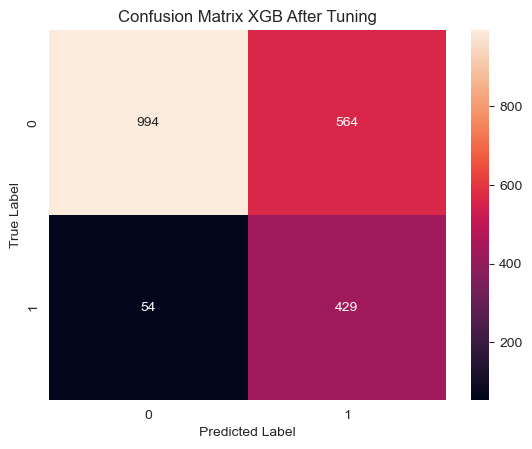

In [850]:
sns.heatmap(confusion_matrix(y_test, y_pred_after_xgb),annot=True,fmt='.0f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title ('Confusion Matrix XGB After Tuning')

plt.show()


Berdasarkan grafik confusion matrix dengan algoritma XGB setelah tuning, dapat disimpulkan :
- Jumlah pelanggan yang diduga tidak membatalkan reservasi dan memang tidak membatalkan reservasi (True Negative) adalah 994
- Jumlah pelanggan yang diduga membatalkan reservasi dan memang membatalkan reservasi (True Positive) adalah 429
- Jumlah pelanggan yang diduga tidak membatalkan reservasi namun sebenarnya membatalkan reservasi (False Negative) adalah 54
- Jumlah pelanggan yang diduga membatalkan reservasi namun sebenarnya tidak membatalkan reservasi (False Positive) adalah 564


## Precision Recall Curve

In [578]:
# predict probabilities
y_pred_proba_after = model_xgb_Tuning.predict_proba(X_test)

# keep probabilities for the positive outcome only
y_pred_proba_after = y_pred_proba_after[:, 1]

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_after)

In [579]:
df_pr_curve_after = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'thresholds': list(thresholds) + [0]
}).sort_values('precision', ascending=False)

df_pr_curve_after.sort_values(['precision','recall'], ascending=[False,False])

,precision,recall,thresholds
1826,1.000000,0.122153,0.738896
1827,1.000000,0.120083,0.753549
1828,1.000000,0.118012,0.759944
1829,1.000000,0.115942,0.760155
1830,1.000000,0.113872,0.761535
...,...,...,...
4,0.237580,1.000000,0.185192
3,0.237463,1.000000,0.184822
2,0.236997,1.000000,0.184692
1,0.236881,1.000000,0.184606


In [612]:
recall_threshold_50 = [0.89]
precision_threshold_50 = [0.43]


''

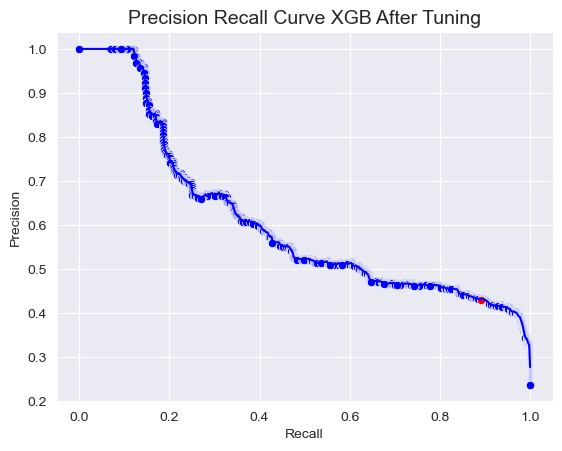

In [851]:
sns.lineplot(data=df_pr_curve_after, x='recall', y='precision', color='b')
sns.scatterplot(data=df_pr_curve_after, x='recall', y='precision', color='b')
sns.scatterplot(x=recall_threshold_50, y=precision_threshold_50, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.title('Precision Recall Curve XGB After Tuning', size=14)
;

Berdasarkan grafik diatas, dapat disimpulkan bahwa:
- Titik merah merupakan letak hasil recall dan precision testset dengan menggunakan model terbaik dari algoritma XGB Classifier yang didapat pada tahapan Hyperparameter Tuning. Threshold yang digunakan secara default adalah 0.5 atau 50 %. 
- Dari grafik diatas, sulit untuk menentukan titik terbaik terdapat pada threshold berapa. Mungkin dengan mengorbankan sedikit nilai precision dapat menekan nilai recall yang lebih tinggi atau sebaliknya mungkin dengan mengobarkan sedikit nilai recall dapat menekan nilai precision yang lebih tinggi dapat berdampak lebih baik terhadap permasalahan bisnis. Oleh karena itu, akan dilakukan perhitungan untuk mencari nilai threshold terbaik berdasarkan pendapatan dan biaya.

## Finding Best Threshold

Model kita menghasilkan prediksi dengan nilai probabilitas. Secara default nilai thresholdnya adalah 50 % atau 0.5, yang mana jika nilai probabilitas dibawah 0.5 maka akan termasuk target kelas 0 dan jika nilai probabilitas diatas 0.5 maka akan termasuk target kelas 1. Dengan mengubah nilai threshold akan berdampak perubahan nilai kepada confusion matrix. Disini kita akan memasukkan beban dari False Postive dan False Negative untuk menentukan nilai threshold terbaik berdasarkan jumlah loss terkecil. 

Harga Per Kamar : $ 89 

Diskon yang diberikan : 13% 

Harga Per Kamar setelah diskon : $ 72

Asumsi Skenario :
- Untuk skenario False Positive, maka hotel mendapatkan loss karena perbedaan selisih harga dari pemberian diskon ($89 * (0.13) = $12). Seharusnya hotel dapat menjual 2 harga kamar dengan harga normal namun hotel mendapatkan loss karena menjual 1 kamar yang diberi diskon. Tapi dengan catatan, hotel memiliki jumlah kamar yang banyak untuk dijadikan spare
- Untuk skenario False Negative, maka hotel kehilangan revenue penuh dari jumlah kamar dikalikan dengan harga kamar. ($89)

In [647]:
harga_kamar = 89
diskon_kamar = 0.13
harga_kamar_diskon = round(harga_kamar * (1-diskon_kamar))

77

In [638]:
list_total_loss =[]

list_threshold = []

i=0.01
while i <= 1.01:
    hasil = 0
    y_dummy=np.where(y_pred_proba_after > i, 1, 0)
    loss = (confusion_matrix(y_test,y_dummy)[0][1]*(harga_kamar-harga_kamar_diskon))               # False Positive
    total = loss + (confusion_matrix(y_test,y_dummy)[1][0]*(harga_kamar))                          # False Negative 

    list_threshold.append(i)
    list_total_loss.append(total)
    i=i+0.01

In [639]:
df_potential_loss_after = pd.DataFrame()
df_potential_loss_after['threshold']=list_threshold
df_potential_loss_after['total_loss']=list_total_loss


df_potential_loss_after=df_potential_loss_after.sort_values('total_loss',ascending=True)
df_potential_loss_after.head()

,threshold,total_loss
41,0.42,9723
40,0.41,9725
38,0.39,9799
37,0.38,9835
43,0.44,9873


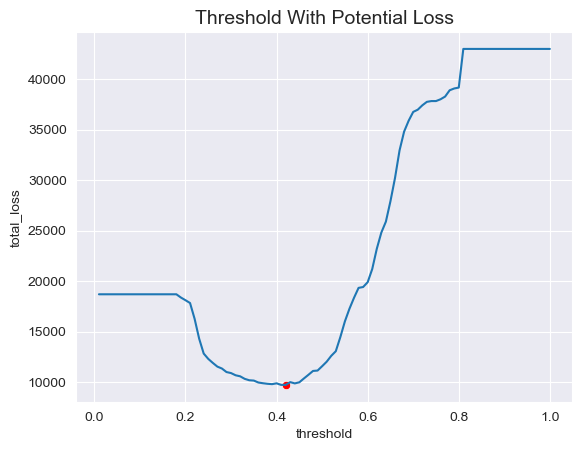

In [1086]:
sns.lineplot(data=df_potential_loss_after, x='threshold', y='total_loss')
sns.scatterplot(x=[0.42], y=[9723], color='r')

plt.title('Threshold With Potential Loss', size=14)
plt.grid(True)
plt.show()

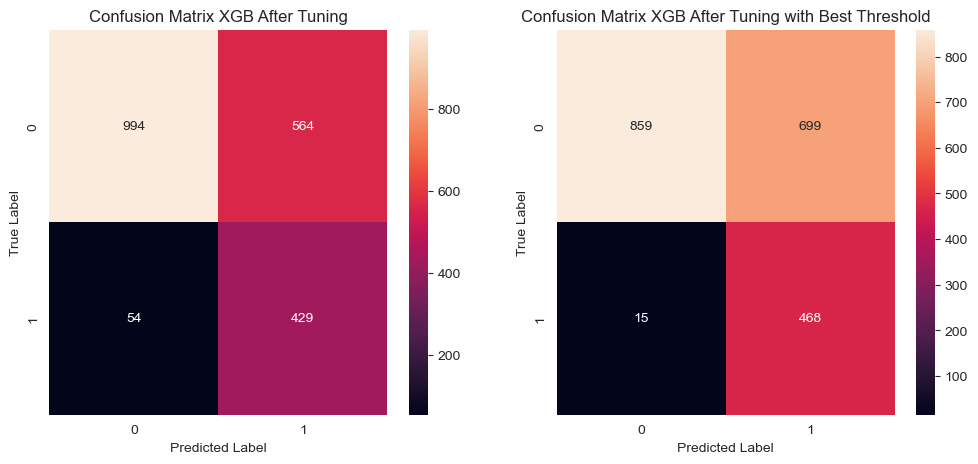

In [869]:
y_best = np.where(y_pred_proba_after>0.42, 1, 0)

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test, y_pred_after_xgb),annot=True,fmt='.0f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title ('Confusion Matrix XGB After Tuning')


plt.subplot(122)
sns.heatmap(confusion_matrix(y_test, y_best),annot=True,fmt='.0f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title ('Confusion Matrix XGB After Tuning with Best Threshold')

plt.show()


In [649]:
print(classification_report(y_test, y_best))

              precision    recall  f1-score   support

           0       0.98      0.55      0.71      1558
           1       0.40      0.97      0.57       483

    accuracy                           0.65      2041
   macro avg       0.69      0.76      0.64      2041
weighted avg       0.85      0.65      0.67      2041



## Feature Importance

Ketika kita membuat model machine learning bertipe 'supervised', kerap kali kita ingin mengetahui feature mana yang paling mempengaruhi model. Feature yang paling mempengaruhi dapat disebutkan feature tersebut memiliki peranan penting dalam pembuatan model ini. Seperti contoh untuk tim bisnis, agar mengetahui feature mana yang mempengaruhi dalam memprediksi model machine learning ini.

In [567]:
importances_score = model_xgb_Tuning[2].feature_importances_
importances_score

# nilai importance score

array([0.00125121, 0.00466795, 0.00882457, 0.00415232, 0.01097018,
       0.01039318, 0.01572194, 0.00980519, 0.00304335, 0.00378389,
       0.00327327, 0.00581015, 0.00165658, 0.0021858 , 0.006765  ,
       0.00500943, 0.02019471, 0.00999986, 0.01789378, 0.03103331,
       0.06674562, 0.1221844 , 0.01063428, 0.01316661, 0.01245498,
       0.14259501, 0.01298842, 0.00282128, 0.00608532, 0.00319365,
       0.0028841 , 0.00226853, 0.00401864, 0.00388481, 0.00333529,
       0.        , 0.        , 0.02002036, 0.00520404, 0.00464441,
       0.37826   , 0.00617456], dtype=float32)

Sebelum itu, mari kita panggil nama kolom setelah dilakukan proses transformasi karena hasil kolom baru setelah proses transformasi masih berupa angka. 

In [568]:
kolom_pipe_1=model_xgb_Tuning[1].transformers_[0][1][1].get_feature_names_out()
kolom_pipe_1

['0_0', '0_1', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7']

In [569]:
model_xgb_Tuning[1].transformers_[0][2]

['country']

In [570]:
kolom_pipe_1_new = ['country' + i[1:] for i in kolom_pipe_1]
kolom_pipe_1_new

# mengganti 0 dengan country

['country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'country_6',
 'country_7']

In [571]:
kolom_pipe_2=model_xgb_Tuning[1].transformers_[1][1].get_feature_names_out()
kolom_pipe_2

array(['continent_Africa', 'continent_America', 'continent_Asia',
       'continent_Europe', 'continent_Oceania', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA'],
      dtype=object)

In [572]:
kolom_pipe_3=model_xgb_Tuning[1].transformers_[2][1].get_feature_names_out()
kolom_pipe_3

array(['deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reserved_room_type_A',
       'reserved_room_type_B', 'reserved_room_type_C',
       'reserved_room_type_D', 'reserved_room_type_E',
       'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L',
       'reserved_room_type_P'], dtype=object)

In [573]:
kolom_pipe_4=model_xgb_Tuning[1].transformers_[3][1].get_feature_names_out()
kolom_pipe_4

array(['previous_cancellations', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests'], dtype=object)

In [574]:
# menggabungkan feature dari keempat kolom pipe

all_features = list(kolom_pipe_1_new)+list(kolom_pipe_2)+list(kolom_pipe_3)+list(kolom_pipe_4)
len(all_features)

42

In [664]:
df_feat_importance = pd.DataFrame()
df_feat_importance['feature'] = all_features
df_feat_importance['importance'] = importances_score
df_feat_importance=df_feat_importance.sort_values('importance', ascending=False)
df_feat_importance.head()

,feature,importance
40,required_car_parking_spaces,0.378260
25,customer_type_Transient,0.142595
21,deposit_type_Non Refund,0.122184
20,deposit_type_No Deposit,0.066746
19,market_segment_Online TA,0.031033


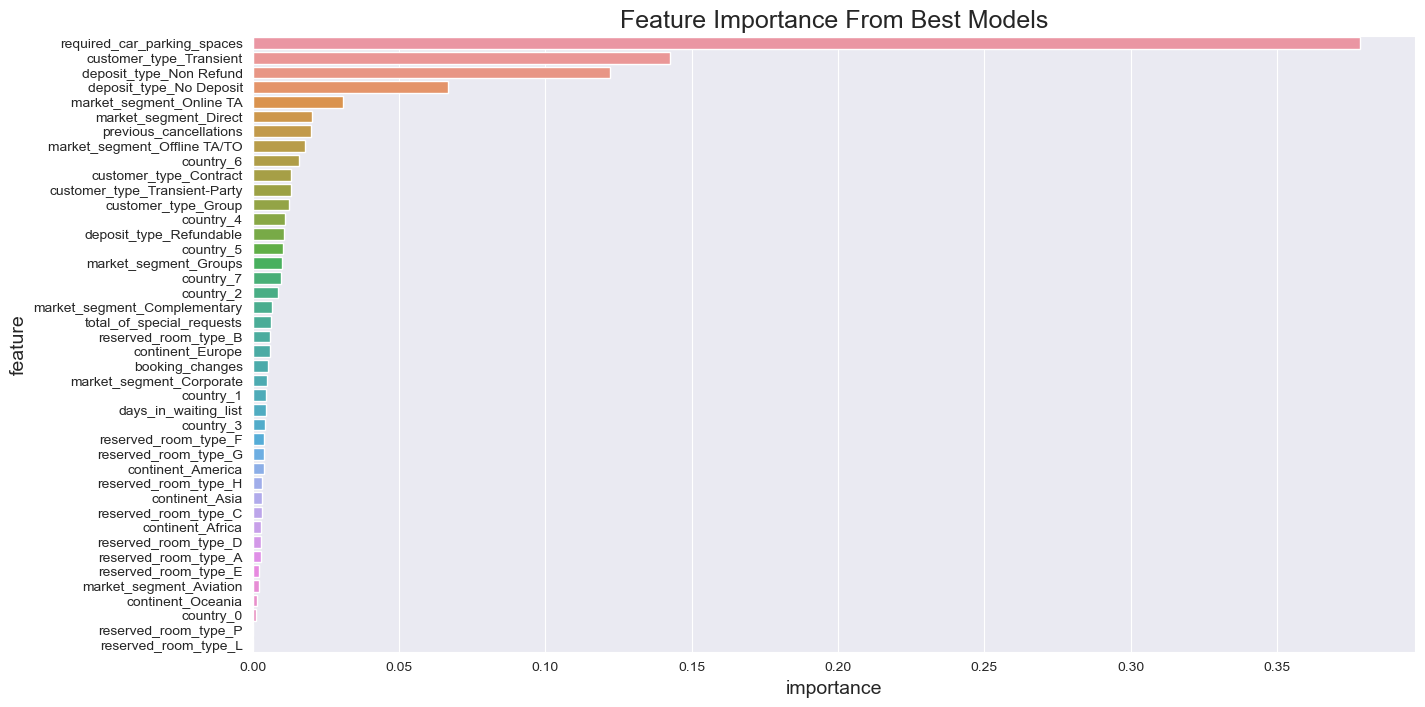

In [881]:
plt.figure(figsize=(15,8))
sns.barplot(
    data=df_feat_importance,
    x='importance',
    y='feature'
)
plt.title('Feature Importance From Best Models',size = 18)
plt.ylabel(ylabel='feature', size=14)
plt.xlabel(xlabel='importance', size=14)

plt.show()

Berdasarkan grafik diatas, dapat disimpulkan bahwa :
- Feature yang paling mempengaruhi model ialah required_car_parking_spaces, customer_type_Transient, deposit_type_Non_Refund dan deposit_type_No_Deposit yang menunjukkan bahwa feature ini memberikan kontribusi penting dalam model.
    - Berdasarkan EDA yang dilakukan sebelumnya, hubungan variable required_car_parking_spaces dengan target ialah nilai required_car_parking_spaces bernilai 1 ke atas maka pelanggan cenderung akan tidak membatalkan reservasi
    - Berdasarkan EDA yang dilakukan sebelumnnya, hubungan variable customer_type_Transient dengan target ialah pelanggan dengan tipe Transient (bermalam dalam periode yang singkat) yang paling sering membatalkan reservasi dibanding tipe pelanggan lainnya.
- Feature reserved_room_type_P dan reserved_room_type_L memiliki nilai importance 0 yang menunjukkan bahwa feature ini tidak memberikan kontribusi apapun dalam model.

## Conclusion

1. Setelah melalui tahapan-tahapan pembuatan model machine learning menggunakan dataset data_hotel_boooking_demand.csv, didapatkan model terbaik menggunakan algoritma Extreme Gradient Boosting (XGB Classifier) dengan nilai F2 score pada trainset adalah 0.736 dan pada testset adalah 0.733. Berdasarkan hasil ini dapat disebutkan bahwa model tidak overfitting. Kombinasi parameter terbaik dari tahapan Hyperparameter Tuning ialah :
- learning_rate : 0.01
- max_depth : 8
- n_estimators : 100
- colsample_bytree : 0.89
- subsample : 0.79
- preprocessing pipe_imp_mode_onehot (encoder): OneHotEncoder
- preprocessing robust (scaler) : MinMaxScaler
- resampling : RandomUnderSampler

2. Berdasarkan pencarian threshold terbaik, dapat disimpulkan bahwa threshold sebesar 0.42 adalah nilai terbaik karena memiliki nilai potential loss paling kecil.

3. Nilai recall yang didapat oleh model dengan menggunakan nilai threshold sebesar 0.42 adalah 0.97. Kita dapat menarik kesimpulan jika model kita dapat memprediksi bahwa 97 % dari jumlah pelanggan yang membatalkan reservasi, benar membatalkan reservasinya. Nilai precision yang didapat oleh model dengan menggunakan nilai threshold sebesar 0.42 adalah 0.40. Model ini dapat memprediksi bahwa 40% dari jumlah pelanggan yang diprediksi membatalkan reservasi, benar membatalkan reservasi.

4. Feature yang paling mempengaruhi model kita adalah required_car_parking_spaces, customer_type_Transient, deposit_type_Non_Refund dan deposit_type_No_Deposit.

**Estimasi perhitungan tanpa model :**

Dengan asumsi ada 2041 pelanggan yang memesan kamar pada Hotel, ada 1558 pelanggan yang jadi menginap dan 483 pelanggan membatalkan reservasi.

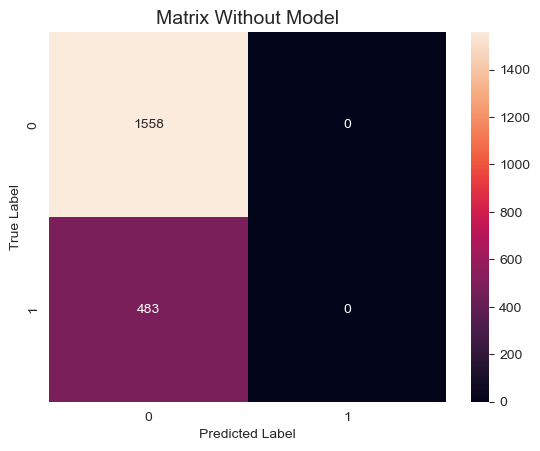

In [974]:
array_tanpa_model = np.array([[y_test.value_counts()[0],0],
                     [y_test.value_counts()[1],0]])

sns.heatmap(array_tanpa_model,annot=True,fmt='.0f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title ('Matrix Without Model',size=14)
plt.show()

In [1091]:
((1558+483)*89) - 42987

138662

Berdasarkan matrix awal tanpa model diatas, dapat kita hitung revenue nya sebagai berikut :

- Estimasi Hotel seharusnya mendapat pendapatan hotel kalau semua pelanggan menginap :<br>
    - 2041 * harga kamar = 2041 * $89 = $181.649
    
- 483 pelanggan membatalkan reservasi kamar hotel maka hotel mendapatkan loss revenue :<br>
    - 483 * harga kamar = 483 * $89 = $42.987

Maka Revenue yang didapat hotel adalah : $181.649 - $42.987 = **$138.662**

**Estimasi perhitungan dengan model :**

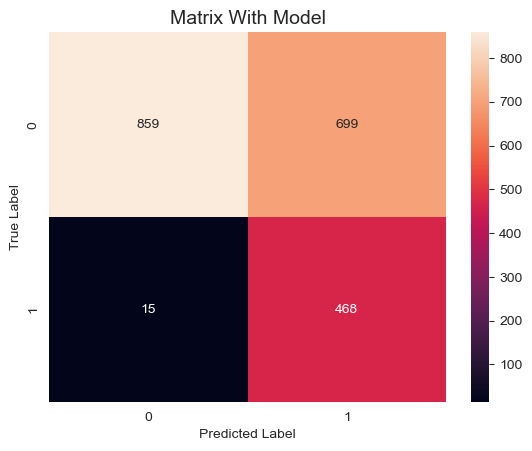

In [973]:
array_tanpa_model = np.array([[y_test.value_counts()[0],0],
                     [y_test.value_counts()[1],0]])

sns.heatmap(confusion_matrix(y_test,y_best),annot=True,fmt='.0f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title ('Matrix With Model', size=14)
plt.show()

In [1093]:
181649 - 15339

166310

Berdasarkan matrix awal dengan model diatas, dapat kita hitung revenue sebagai berikut :
- Estimasi Hotel seharusnya mendapat pendapatan hotel kalau semua pelanggan menginap :<br>
    - 2041 * harga kamar = 2041 * $89 = $181.649
    
- 15 pelanggan diprediksi tidak membatalkan reservasi kamar hotel namun membatalkan reservasi (False Negative) maka hotel kehilangan revenue :
    - 15 * harga kamar = 15 * $89 = $1.335 
- 699 pelanggan diprediksi membatalkan reservasi kamar hotel namun tidak membatalkan reservasi (False Positive) maka hotel mendapatkan loss revenue :
    - 699 * (harga kamar - harga kamar diskon) = 699 * ($89-$77) = $8.388
    - Dengan catatan, hotel kita ini merupakan hotel besar yang memiki banyak kamar sehingga dapat menampung pelanggan yang diprediksi membatalkan reservasi kamar namun tidak membatalkan reservasi.
- 468 pelanggan diprediksi membatalkan reservasi kamar hotel dan menjual ke pelanggan lain dengan harga diskon maka hotel mendapatkan loss revenue :
    - 468 * (harga kamar - harga kamar diskon) = 468 * ($89-$77) = $5.616

Loss Revenue yang didapat oleh Hotel sebesar $1.335 + $8.388 + $5.616 = **$15.339**<br>
Maka Revenue yang didapat hotel adalah : $181.649 - $15.339 = **$166.310**




| Model           | Loss Revenue | Revenue |
|---------------|:------------:|:------------:|
| Without Model |   $ 42.987   | $ 138.662  |
| With Model    |   $ 15.339   | $ 166.310  |

Berdasarkan perhitungan tanpa dan dengan model, terdapat pengurangan nilai loss revenue dari $42.987 menjadi $15.339. Revenue yang didapat hotel meingkat sebesar 20 % dari $138.662 menjadi $166.310

## Recommendation

1. Mencoba model menggunakan pendekatan algoritma lain selain XGBoosting dan Light Gradient Boosting pada tahapan Hyperparameter Tuning.
2. Membuat model machine learning baru dengan menghapus feature-feature yang tidak dianggap penting dari hasil Feature Importance kemungkinan dapat memprediksi model dengan menghasilkan nilai scoring yang lebih baik.
3. Model ini beranggappan bahwa hotel ini merupakan hotel besar yang memiliki jumlah kamar banyak. Tidak terdapat constraint atau pembatas jumlah kamar hotel sehingga memerlukan constraint jumlah kamar hotel agar model dapat memprediksi lebih sesuai dengan ketersediaan jumlah kamar hotel tersebut.
4. Membuat kebijakan hotel untuk meminta konfirmasi kepada pelanggan apakah jadi menginap maksimal seminggu sebelum hari reservasi. Apabila pelanggan tidak memberikan konfirmasi maksimal seminggu sebelum tanggal reservasi maka hotel akan membatalkan reservasi dan menjual kamar tersebut kepada pelanggan lain.

## Pickle

In [337]:
import pickle

In [624]:
pickle.dump(gridsearch_xgb.best_estimator_, open("best_model_result_XGB.sav", "wb"))

In [884]:
model_load = pickle.load(open("best_model_result_XGB.sav", "rb"))

In [885]:
model_load

Pipeline(steps=[('resampling', RandomUnderSampler(random_state=0)),
                ('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_imp_mode_binary',
                                                  Pipeline(steps=[('imp_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['country']),
                                                 ('pipe_imp_mode_onehot',
                                                  Pipeline(steps=[('imp_mode',
                                                                   SimpleImputer(strategy='...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=0, ...))])

## Predict to New Customer

Pada tahapan ini, kita coba menginput model dengan data dari pelanggan baru yang melakukan reservasi di hotel kemudian kita coba memprediksi apakah pelanggan akan membatalkan reservasi atau tidak. Data pelanggan sebagai berikut :

In [889]:
new_cust = pd.DataFrame({
    'country':['INA'],
    'continent':['Asia'],
    'market_segment':['Onlline TA'],
    'previous_cancellations':[1],
    'booking_changes':[0],
    'deposit_type':['No Deposit'],
    'days_in_waiting_list':[0],
    'customer_type':['Transient'],
    'reserved_room_type':['A'],
    'required_car_parking_spaces':[0],
    'total_of_special_requests':[0]
})

new_cust

,country,continent,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
0,INA,Asia,Onlline TA,1,0,No Deposit,0,Transient,A,0,0


In [893]:
proba_new_cust=model_load.predict_proba(new_cust)[0,1]
if proba_new_cust > 0.42:   # Nilai threshold 0.42 atau 42%
    print ('new_cust is predicted to be cancelled the reservation')
    target_new_cust = 1
else:
    print ('new_cust is predicted not to be cancelled the reservation')
    target_new_cust = 0

new_cust is predicted to be cancelled the reservation


Berdasarkan hasil prediksi menggunakan model kita ini, pelanggan dengan ciri-ciri seperti diatas akan diprediksi membatalkan reservasi atau tergolong target kelas 1.